In [78]:
import seaborn as sns
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt


## فراخوانی داده

In [79]:
data1= pd.read_excel('Actual Data imputedMissinValue.xlsx')
print(data1.shape)
data1.head()

(230, 24)


,Sex,Age,History of shortness of breath,History of heart disease,Family history of heart disease,History of high blood pressure,Number of hospitalization days,Target,FBS,CHOL,...,Hb,PT,PTT,Trop i,BPs,BPd,Heart rate,Diabetes,Smoke,Chest pain
0,0,58,0,0,1,0,1,4,110.0,173.0,...,13.5,12.0,37.0,0.0,126.0,69.0,78.0,0,0,0.0
1,0,65,0,0,1,0,6,3,100.0,200.0,...,12.2,12.0,30.0,1.0,110.0,70.0,88.0,1,0,0.0
2,1,77,0,1,1,0,10,4,70.0,130.0,...,14.0,30.0,45.0,0.0,130.0,60.0,69.0,0,0,0.0
3,0,75,0,1,0,0,4,2,108.0,120.0,...,12.2,12.6,30.0,0.0,130.0,80.0,70.0,0,1,0.0
4,0,80,0,0,0,0,5,2,85.0,179.0,...,13.7,12.0,30.0,0.0,142.0,93.0,150.0,0,1,0.0


In [80]:
colname=data1.columns
print(colname)

Index(['Sex', 'Age', 'History of shortness of breath',
       'History of heart disease', 'Family history of heart disease',
       'History of high blood pressure', 'Number of hospitalization days',
       'Target', 'FBS', 'CHOL', 'TG', 'HDL', 'LDL', 'CPKMB', 'Hb', 'PT', 'PTT',
       'Trop i', 'BPs', 'BPd', 'Heart rate', 'Diabetes', 'Smoke',
       'Chest pain'],
      dtype='object')


## نمایش تعداد کلاس ها

In [81]:
class1=data1[data1['Target']==1]
class2=data1[data1['Target']==2]
class3=data1[data1['Target']==3]
class4=data1[data1['Target']==4]
class5=data1[data1['Target']==5]
print(class1.shape)
print(class2.shape)
print(class3.shape)
print(class4.shape)
print(class5.shape)

(25, 24)
(54, 24)
(36, 24)
(34, 24)
(81, 24)


In [82]:
data1['Target'].value_counts()

5    81
2    54
3    36
4    34
1    25
Name: Target, dtype: int64

In [83]:
data1.isnull().sum()

Sex                                0
Age                                0
History of shortness of breath     0
History of heart disease           0
Family history of heart disease    0
History of high blood pressure     0
Number of hospitalization days     0
Target                             0
FBS                                0
CHOL                               0
TG                                 0
HDL                                0
LDL                                0
CPKMB                              0
Hb                                 0
PT                                 0
PTT                                0
Trop i                             0
BPs                                0
BPd                                0
Heart rate                         0
Diabetes                           0
Smoke                              0
Chest pain                         0
dtype: int64

In [84]:
data1.describe()

,Sex,Age,History of shortness of breath,History of heart disease,Family history of heart disease,History of high blood pressure,Number of hospitalization days,Target,FBS,CHOL,...,Hb,PT,PTT,Trop i,BPs,BPd,Heart rate,Diabetes,Smoke,Chest pain
count,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,...,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000
mean,0.486957,62.465217,0.143478,0.539130,0.226087,0.060870,4.100000,3.400000,113.615368,168.877047,...,13.730796,13.215843,35.466903,0.067435,127.933124,77.045927,74.385690,0.043478,0.243478,0.071478
std,0.500920,13.175209,0.351324,0.499554,0.419208,0.239612,2.830511,1.440524,45.547471,39.046726,...,1.895595,3.527961,8.826264,0.248016,25.792232,14.277579,15.388437,0.204376,0.430117,0.256092
min,0.000000,23.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,62.000000,88.000000,...,5.600000,10.000000,30.000000,0.000000,4.000000,26.000000,40.000000,0.000000,0.000000,0.000000
25%,0.000000,54.000000,0.000000,0.000000,0.000000,0.000000,2.250000,2.000000,86.000000,140.000000,...,12.725000,12.000000,31.000000,0.000000,110.000000,70.000000,65.250000,0.000000,0.000000,0.000000
50%,0.000000,62.000000,0.000000,1.000000,0.000000,0.000000,4.000000,3.500000,100.000000,167.062382,...,13.800000,12.000000,34.000000,0.000000,124.000000,75.000000,72.000000,0.000000,0.000000,0.000000
75%,1.000000,73.000000,0.000000,1.000000,0.000000,0.000000,5.000000,5.000000,121.500000,190.000000,...,14.700000,13.200000,37.000000,0.000000,140.000000,83.000000,80.000000,0.000000,0.000000,0.000000
max,1.000000,94.000000,1.000000,1.000000,1.000000,1.000000,22.000000,5.000000,318.000000,290.000000,...,21.400000,50.000000,130.000000,1.000000,220.000000,140.000000,160.000000,1.000000,1.000000,1.000000


## بررسی همبستگی 

In [85]:
data1.corr(method='pearson')

,Sex,Age,History of shortness of breath,History of heart disease,Family history of heart disease,History of high blood pressure,Number of hospitalization days,Target,FBS,CHOL,...,Hb,PT,PTT,Trop i,BPs,BPd,Heart rate,Diabetes,Smoke,Chest pain
Sex,1.000000,-0.050356,-0.026540,-0.076480,-0.027486,0.043026,-0.046814,-0.210598,-0.022234,0.042069,...,-0.012076,0.054234,-0.079229,-0.039462,-0.058016,-0.034816,-0.084012,-0.079746,0.156680,0.014789
Age,-0.050356,1.000000,0.016649,0.156124,-0.012801,0.018656,0.162564,0.054116,-0.034090,-0.101826,...,-0.012245,-0.064140,-0.062436,-0.040219,0.084841,0.107640,-0.011782,0.073542,-0.015452,-0.047431
History of shortness of breath,-0.026540,0.016649,1.000000,-0.019689,0.015985,0.103296,0.003074,-0.605721,-0.152165,0.007014,...,-0.009287,-0.028994,-0.105462,-0.011294,0.082025,0.131007,0.086646,-0.087259,0.027893,0.128193
History of heart disease,-0.076480,0.156124,-0.019689,1.000000,0.207797,0.016496,0.125384,0.087382,-0.072973,-0.082812,...,-0.017824,0.085302,0.049438,-0.008526,-0.015234,-0.066891,-0.052837,0.111577,-0.024211,-0.131870
Family history of heart disease,-0.027486,-0.012801,0.015985,0.207797,1.000000,0.166712,0.117030,-0.034710,-0.020194,-0.039357,...,-0.024629,0.072529,-0.019201,0.080784,-0.077909,-0.064806,-0.072666,0.037673,-0.064442,-0.011262
History of high blood pressure,0.043026,0.018656,0.103296,0.016496,0.166712,1.000000,0.048933,0.005061,0.004362,0.043999,...,0.017967,0.049550,0.023444,0.077590,0.096758,0.046408,0.172434,0.213236,-0.017317,-0.000050
Number of hospitalization days,-0.046814,0.162564,0.003074,0.125384,0.117030,0.048933,1.000000,0.014779,0.037135,0.043201,...,0.068140,-0.048690,0.043804,0.072897,-0.013973,-0.045484,0.054140,0.181168,-0.081063,0.065038
Target,-0.210598,0.054116,-0.605721,0.087382,-0.034710,0.005061,0.014779,1.000000,0.154708,-0.021264,...,0.017050,-0.026916,0.043392,0.038452,0.010668,-0.084856,-0.071070,-0.014833,-0.256542,-0.025284
FBS,-0.022234,-0.034090,-0.152165,-0.072973,-0.020194,0.004362,0.037135,0.154708,1.000000,0.045321,...,-0.128742,0.052175,-0.087479,0.081831,-0.082627,-0.142894,-0.056547,0.081880,0.021504,-0.017657
CHOL,0.042069,-0.101826,0.007014,-0.082812,-0.039357,0.043999,0.043201,-0.021264,0.045321,1.000000,...,-0.097703,-0.151607,-0.004711,-0.077310,-0.090859,-0.028884,0.035407,0.021863,0.126759,-0.042826


<AxesSubplot:>

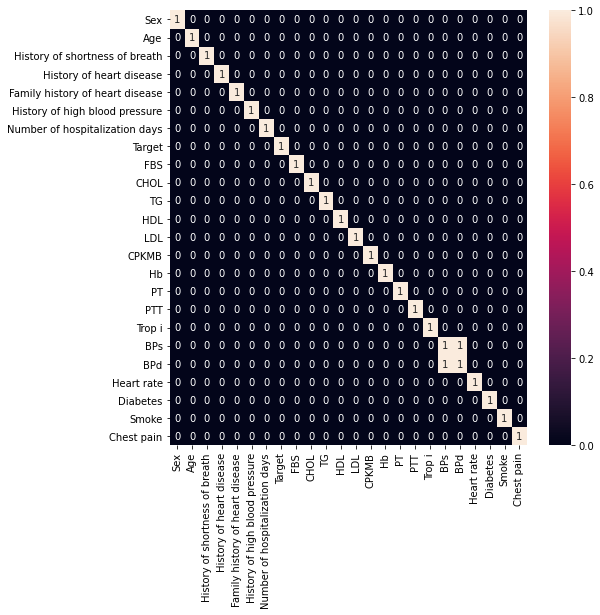

In [86]:
plt.figure(figsize=(8, 8))
sns.heatmap(data1.corr(method='pearson')>0.7, annot=True)

In [87]:
data1.groupby(['Target', 'Sex']).agg({'Age':np.mean})

Age
Target Sex           
1      0    65.562500
       1    61.777778
2      0    70.833333
       1    58.500000
3      0    60.360000
       1    67.818182
4      0    63.409091
       1    60.666667
5      0    62.632653
       1    65.062500

In [88]:
data1.groupby(['Target', 'Sex']).agg({'Sex':np.size})

Sex
Target Sex     
1      0     16
       1      9
2      0      6
       1     48
3      0     25
       1     11
4      0     22
       1     12
5      0     49
       1     32

In [89]:
data1.groupby('Target').agg({'FBS':np.mean})

,FBS
Target,
1,99.520000
2,109.030763
3,106.215833
4,124.218071
5,119.860358


In [90]:
data1.groupby('Target').agg({'CHOL':np.mean})

,CHOL
Target,
1,162.560000
2,174.669857
3,169.495440
4,166.601804
5,167.645079


In [91]:
data1.groupby('Target').agg({'LDL':np.mean})

,LDL
Target,
1,88.590423
2,106.201606
3,98.382402
4,90.563202
5,97.284975


In [92]:
data1.groupby('Target').agg({'HDL':np.mean})

,HDL
Target,
1,46.392000
2,49.208896
3,46.229666
4,50.344256
5,48.509069


In [93]:
data1.groupby('Target').agg({'TG':np.mean})

,TG
Target,
1,148.640000
2,149.259428
3,142.767841
4,139.311738
5,135.714785


In [94]:
data1.groupby('Target').agg({'CPKMB':np.mean})

,CPKMB
Target,
1,24.160000
2,27.877499
3,22.637845
4,24.333846
5,21.229697


In [95]:
data1.groupby('Target').agg({'Hb':np.mean})

,Hb
Target,
1,13.828000
2,13.598177
3,13.732594
4,13.759401
5,13.776402


In [96]:
data1.groupby('Target').agg({'PT':np.mean})

,PT
Target,
1,13.080000
2,13.716429
3,12.501691
4,13.663878
5,13.053382


In [97]:
data1.groupby('Target').agg({'PTT':np.mean})

,PTT
Target,
1,33.480000
2,35.119463
3,37.262890
4,35.447021
5,35.521902


In [98]:
data1.groupby('Target').agg({'BPs':np.mean})

,BPs
Target,
1,135.680000
2,122.814815
3,128.444444
4,125.782895
5,129.629630


In [99]:
data1.groupby('Target').agg({'BPd':np.mean})

,BPd
Target,
1,83.840000
2,75.203704
3,78.888889
4,73.693038
5,76.765432


In [100]:
data1.groupby('Target').agg({'Heart rate':np.mean})

,Heart rate
Target,
1,74.480000
2,75.537037
3,77.583333
4,72.462019
5,72.975309


In [101]:
data1.groupby('Target').agg({'Number of hospitalization days':np.mean})

,Number of hospitalization days
Target,
1,4.440000
2,3.388889
3,4.638889
4,4.941176
5,3.876543


In [102]:
data1.groupby(['Target', 'Trop i']).agg({'Sex':np.size})

Sex
Target Trop i     
1      0.00     23
       1.00      2
2      0.00     50
       0.04      2
       1.00      2
3      0.00     34
       1.00      2
4      0.00     29
       0.08      1
       0.35      1
       1.00      3
5      0.00     75
       1.00      6

In [103]:
data1.groupby(['Target', 'Trop i']).agg({'Age':np.mean})

Age
Target Trop i           
1      0.00    64.173913
       1.00    64.500000
2      0.00    59.740000
       0.04    72.000000
       1.00    51.000000
3      0.00    62.411765
       1.00    66.500000
4      0.00    62.482759
       0.08    66.000000
       0.35    62.000000
       1.00    61.000000
5      0.00    63.893333
       1.00    59.833333

In [104]:
data1.groupby(['Target', 'Diabetes']).agg({'Age':np.mean})

Age
Target Diabetes           
1      0         64.200000
2      0         59.461538
       1         70.500000
3      0         61.548387
       1         69.400000
4      0         62.090909
       1         74.000000
5      0         63.835443
       1         54.000000

In [105]:
data1.groupby(['Target', 'Smoke']).agg({'Age':np.mean})

Age
Target Smoke           
1      0      64.400000
       1      63.400000
2      0      57.608696
       1      61.548387
3      0      62.548387
       1      63.200000
4      0      61.806452
       1      69.000000
5      0      64.072464
       1      60.833333

In [106]:
data1.groupby(['Target', 'Chest pain']).agg({'Age':np.mean})

Age
Target Chest pain           
1      0.00        65.450000
       1.00        59.200000
2      0.00        59.943396
       1.00        56.000000
3      0.00        62.852941
       1.00        59.000000
4      0.00        62.187500
       0.44        62.000000
       1.00        71.000000
5      0.00        63.905405
       1.00        60.285714

In [107]:
data1.groupby(['Target', 'History of shortness of breath']).agg({'Age':np.mean})

Age
Target History of shortness of breath           
1      1                               64.200000
2      0                               59.893617
       1                               59.714286
3      0                               62.828571
       1                               56.000000
4      0                               62.441176
5      0                               63.592593

In [108]:
data1.groupby(['Target', 'History of heart disease']).agg({'Age':np.mean})

Age
Target History of heart disease           
1      0                         62.846154
       1                         65.666667
2      0                         58.964286
       1                         60.846154
3      0                         61.631579
       1                         63.764706
4      0                         64.600000
       1                         61.541667
5      0                         58.361111
       1                         67.777778

In [109]:
data1.groupby(['Target', 'History of high blood pressure']).agg({'Age':np.mean})

Age
Target History of high blood pressure           
1      0                               64.541667
       1                               56.000000
2      0                               59.686275
       1                               63.000000
3      0                               62.323529
       1                               68.000000
4      0                               62.586207
       1                               61.600000
5      0                               63.487179
       1                               66.333333

 ## بررسی توزیع متغییرها

In [110]:
data1.skew()

Sex                                0.052535
Age                               -0.204133
History of shortness of breath     2.047390
History of heart disease          -0.158036
Family history of heart disease    1.318274
History of high blood pressure     3.697492
Number of hospitalization days     2.764649
Target                            -0.231305
FBS                                2.206709
CHOL                               0.451889
TG                                 1.815907
HDL                                1.041869
LDL                                3.939043
CPKMB                              5.864537
Hb                                -0.017963
PT                                 6.724812
PTT                                6.826837
Trop i                             3.500588
BPs                                0.488884
BPd                                0.597797
Heart rate                         1.932508
Diabetes                           4.506660
Smoke                           

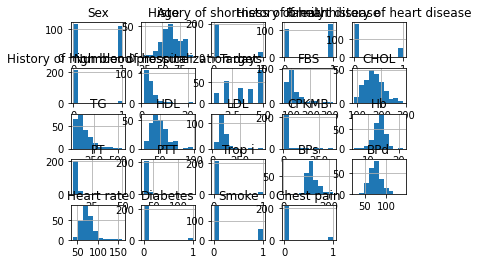

In [111]:
data1.hist()
plt.show()

# شمارش داده های مفقوده

In [112]:
data1.isnull().sum()

Sex                                0
Age                                0
History of shortness of breath     0
History of heart disease           0
Family history of heart disease    0
History of high blood pressure     0
Number of hospitalization days     0
Target                             0
FBS                                0
CHOL                               0
TG                                 0
HDL                                0
LDL                                0
CPKMB                              0
Hb                                 0
PT                                 0
PTT                                0
Trop i                             0
BPs                                0
BPd                                0
Heart rate                         0
Diabetes                           0
Smoke                              0
Chest pain                         0
dtype: int64

# شناسایی نقاط پرت

## شناسایی نقاط پرت بوسیله نمودار جعبه ای

<AxesSubplot:>

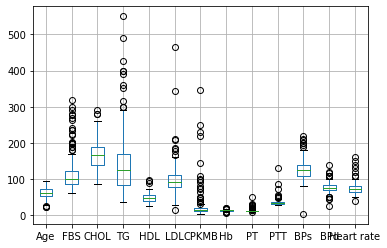

In [113]:
data1.boxplot(column=['Age','FBS','CHOL','TG','HDL','LDL','CPKMB',
                      'Hb','PT','PTT','BPs','BPd','Heart rate']) 

## z-score شناسایی نقاط پرت بوسیله روش 

In [114]:
toDrop = []

In [115]:
from scipy import stats
z=np.abs(stats.zscore(data1['Age']))
threshold=3
# print(np.where(z>3))
toDrop.extend(np.where(z>3)[0])
toDrop

[76]

In [116]:
z=np.abs(stats.zscore(data1['FBS']))
threshold=3
toDrop.extend(list(np.where(z>3)[0]))
toDrop

[76, 19, 52, 54, 88, 94, 158, 182]

In [117]:
z=np.abs(stats.zscore(data1['CHOL']))
threshold=3
toDrop.extend(list(np.where(z>3)[0]))
toDrop

[76, 19, 52, 54, 88, 94, 158, 182, 85]

In [118]:
z=np.abs(stats.zscore(data1['TG']))
threshold=3
toDrop.extend(list(np.where(z>3)[0]))
toDrop

[76, 19, 52, 54, 88, 94, 158, 182, 85, 54, 93, 105, 115, 161, 187]

In [119]:
z=np.abs(stats.zscore(data1['HDL']))
threshold=3
toDrop.extend(list(np.where(z>3)[0]))


In [120]:
z=np.abs(stats.zscore(data1['LDL']))
threshold=3
toDrop.extend(list(np.where(z>3)[0]))


In [121]:
z=np.abs(stats.zscore(data1['CPKMB']))
threshold=3
toDrop.extend(list(np.where(z>3)[0]))


In [122]:
z=np.abs(stats.zscore(data1['Hb']))
threshold=3
toDrop.extend(list(np.where(z>3)[0]))


In [123]:
z=np.abs(stats.zscore(data1['PT']))
threshold=3
toDrop.extend(list(np.where(z>3)[0]))


In [124]:
z=np.abs(stats.zscore(data1['PTT']))
threshold=3
toDrop.extend(list(np.where(z>3)[0]))


In [125]:
z=np.abs(stats.zscore(data1['BPs']))
threshold=3
toDrop.extend(list(np.where(z>3)[0]))


In [126]:
z=np.abs(stats.zscore(data1['BPd']))
threshold=3
toDrop.extend(list(np.where(z>3)[0]))


In [127]:
z=np.abs(stats.zscore(data1['Heart rate']))
threshold=3
toDrop.extend(list(np.where(z>3)[0]))


In [128]:
toDrop = list(set(toDrop))
len(toDrop)

41

# حذف نقاط پرت

In [129]:
df=data1.drop(toDrop, axis=0)
# df

In [130]:
df=pd.DataFrame(df)
df.to_excel('Actual Data_Outlier Detection.xlsx', index=False)

# بالانس کردن داده ها

In [131]:
# OverSampling
from imblearn.over_sampling import RandomOverSampler

# Loading the DATA
df = pd.read_excel('Actual Data_Outlier Detection.xlsx')


# Dividing the data into X and Y
X=df.drop('Target',axis=1)
y=df['Target']

oversample = RandomOverSampler(sampling_strategy='minority')
X_oversample, y_oversample = oversample.fit_resample(X, y)

In [132]:
X_over=pd.DataFrame(X_oversample)
y_over=pd.DataFrame(y_oversample)

In [133]:
print(X_over.shape, y_over.shape)

(240, 23) (240, 1)


In [134]:
y_over.value_counts()

Target
1         70
5         70
2         42
3         30
4         28
dtype: int64

In [135]:
df=pd.concat([X_over, y_over], axis=1)
df.shape

(240, 24)

In [136]:
df.head()

,Sex,Age,History of shortness of breath,History of heart disease,Family history of heart disease,History of high blood pressure,Number of hospitalization days,FBS,CHOL,TG,...,PT,PTT,Trop i,BPs,BPd,Heart rate,Diabetes,Smoke,Chest pain,Target
0,0,58,0,0,1,0,1,110.0,173.0,75.0,...,12.0,37.0,0.0,126.0,69.0,78.0,0,0,0.0,4
1,0,65,0,0,1,0,6,100.0,200.0,199.0,...,12.0,30.0,1.0,110.0,70.0,88.0,1,0,0.0,3
2,0,75,0,1,0,0,4,108.0,120.0,72.0,...,12.6,30.0,0.0,130.0,80.0,70.0,0,1,0.0,2
3,0,67,0,1,1,0,6,85.0,100.0,50.0,...,12.0,33.0,0.0,162.0,100.0,66.0,0,0,0.0,4
4,1,74,0,1,0,0,9,110.0,120.0,130.0,...,12.0,30.0,0.0,128.0,70.0,80.0,0,0,0.0,5


In [137]:
df.to_excel('Actual Data_BalanceData_oversampling.xlsx', index=False)

In [138]:
#smote
from imblearn.over_sampling import SMOTE

In [139]:
smote_sampler = SMOTE(random_state=42)

In [140]:
X_smote , y_smote = smote_sampler.fit_resample(X,y)

In [141]:
X_smote.shape

(350, 23)

In [142]:
y.value_counts()

5    70
2    42
3    30
4    28
1    19
Name: Target, dtype: int64

In [143]:
X_smote= pd.DataFrame(X_smote)
y_smote= pd.DataFrame(y_smote)
y_smote.value_counts()

Target
1         70
2         70
3         70
4         70
5         70
dtype: int64

In [144]:
X_smote.shape

(350, 23)

In [145]:
dfsmote=pd.concat([X_smote, y_smote], axis=1)

In [146]:
dfsmote.to_excel('Actual Data_BalanceData_SMOTE.xlsx', index=False)

In [70]:
# ADASYN
from imblearn.over_sampling import ADASYN

In [71]:
X_adasyn, y_adasyn = ADASYN().fit_resample(X, y)

In [72]:
X_adasyn= pd.DataFrame(X_adasyn)
y_adasyn= pd.DataFrame(y_adasyn)
y_adasyn.value_counts()

Target
2         72
3         69
5         69
1         67
4         67
dtype: int64

In [73]:
X_adasyn.shape

(344, 24)

In [74]:
dfadasyn=pd.concat([X_adasyn, y_adasyn], axis=1)

In [75]:
dfadasyn.to_excel('Actual Data_BalanceData_Adasyn.xlsx', index=False)

In [76]:
# Normalization

In [77]:
dfSM=pd.read_excel('Actual Data_BalanceData_SMOTE.xlsx')

In [143]:
dfSM.shape

(345, 25)

In [144]:
XSM= dfSM.drop('Target', axis=1)
ySM= dfSM['Target']

from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
SS.fit(XSM)
X_normal_SM = SS.transform(XSM)
X_normal_SM = pd.DataFrame(X_normal_SM)
dfSM=pd.concat([X_normal_SM, ySM], axis=1)
col = list(set(XSM.columns))
col.append('Target')
dfSM.columns = col
# X_normal_SM.head

In [165]:
dfSM.to_excel('Actual Data_BalanceData_SMOTE.xlsx', index=False)

# انتخاب ویژگی

In [166]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

In [167]:
dfada=pd.read_excel('Actual Data_BalanceData_Adasyn.xlsx')
dfada.head()

,Sex,Age,History of shortness of breath,History of heart disease,Family history of heart disease,History of high blood pressure,Number of hospitalization days,FBS,CHOL,TG,...,PT,PTT,Trop i,BPs,BPd,Heart rate,Diabetes,Smoke,Chest pain,Target
0,0,58,0,0,1,0,1,110.0,173.0,75.0,...,12.0,37.0,0.0,126.0,69.0,78.0,0,0.0,0.0,4
1,0,65,0,0,1,0,6,100.0,200.0,199.0,...,12.0,30.0,1.0,110.0,70.0,88.0,1,0.0,0.0,3
2,0,75,0,1,0,0,4,108.0,120.0,72.0,...,12.6,30.0,0.0,130.0,80.0,70.0,0,1.0,0.0,2
3,0,67,0,1,1,0,6,85.0,100.0,50.0,...,12.0,33.0,0.0,162.0,100.0,66.0,0,0.0,0.0,4
4,1,74,0,1,0,0,9,110.0,120.0,130.0,...,12.0,30.0,0.0,128.0,70.0,80.0,0,0.0,0.0,5


In [168]:
dfsm=pd.read_excel('Actual Data_BalanceData_SMOTE.xlsx')
dfsm.head()

,HDL,Heart rate,Number of hospitalization days,LDL,CHOL,Sex,History of heart disease,BPs,Smoke,Trop i,...,History of shortness of breath,CPK,Family history of heart disease,FBS,History of high blood pressure,PT,BPd,CPKMB,Hb,Target
0,-0.806671,-0.389797,-0.527046,-0.861640,1.708934,-0.189832,-1.092845,0.096309,0.061710,-0.930255,...,-0.600490,0.632021,-0.274532,-0.056174,-0.725853,0.398298,-0.163663,-0.600692,-0.326674,4
1,-0.806671,0.229926,-0.527046,-0.861640,1.708934,-0.189832,0.536505,-0.228756,0.814902,1.115233,...,-0.600490,-1.161598,4.376372,-0.854438,-0.635635,1.318462,6.110101,-0.600692,-0.326674,3
2,-0.806671,1.115244,-0.527046,1.160577,-0.585160,-0.189832,-0.115235,0.031296,-1.416779,-0.979743,...,-0.115544,-1.161598,-0.274532,0.143392,0.266541,-0.337834,-0.163663,1.879647,-0.326674,2
3,-0.806671,0.406990,-0.527046,1.160577,1.708934,-0.189832,0.536505,-0.716353,-1.974699,-1.342652,...,-0.600490,-0.392904,-0.274532,1.739920,2.070893,-0.705899,-0.163663,-0.600692,-0.326674,4
4,1.239663,1.026712,-0.527046,1.160577,-0.585160,-0.189832,1.514114,0.096309,-1.416779,-0.022982,...,-0.600490,-1.161598,-0.274532,0.043609,-0.635635,0.582331,-0.163663,-0.600692,-0.326674,5


In [169]:
dfover=pd.read_excel('Actual Data_BalanceData_oversampling.xlsx')
dfover.head()

,HDL,Heart rate,Number of hospitalization days,LDL,CHOL,Sex,History of heart disease,BPs,Smoke,Trop i,...,History of shortness of breath,CPK,Family history of heart disease,FBS,History of high blood pressure,PT,BPd,CPKMB,Hb,Target
0,-0.806671,-0.389797,-0.527046,-0.861640,1.708934,-0.189832,-1.092845,0.096309,0.061710,-0.930255,...,-0.600490,0.632021,-0.274532,-0.056174,-0.725853,0.398298,-0.163663,-0.600692,-0.326674,4
1,-0.806671,0.229926,-0.527046,-0.861640,1.708934,-0.189832,0.536505,-0.228756,0.814902,1.115233,...,-0.600490,-1.161598,4.376372,-0.854438,-0.635635,1.318462,6.110101,-0.600692,-0.326674,3
2,-0.806671,1.115244,-0.527046,1.160577,-0.585160,-0.189832,-0.115235,0.031296,-1.416779,-0.979743,...,-0.115544,-1.161598,-0.274532,0.143392,0.266541,-0.337834,-0.163663,1.879647,-0.326674,2
3,-0.806671,0.406990,-0.527046,1.160577,1.708934,-0.189832,0.536505,-0.716353,-1.974699,-1.342652,...,-0.600490,-0.392904,-0.274532,1.739920,2.070893,-0.705899,-0.163663,-0.600692,-0.326674,4
4,1.239663,1.026712,-0.527046,1.160577,-0.585160,-0.189832,1.514114,0.096309,-1.416779,-0.022982,...,-0.600490,-1.161598,-0.274532,0.043609,-0.635635,0.582331,-0.163663,-0.600692,-0.326674,5


In [170]:
# dfada
X=dfada.drop('Target', axis=1)
y=dfada['Target']
from sklearn import preprocessing
y = preprocessing.label_binarize(y, classes=[1, 2, 3, 4, 5])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,
                                                    random_state=100)
X_train.shape, X_test.shape

((258, 24), (86, 24))

In [173]:
# forward selection
sfs1 = SFS(RandomForestClassifier(n_jobs=-1,n_estimators=200,max_depth=12), 
           k_features=15, 
           forward=True, 
           floating=False, 
           verbose=1,
           scoring='roc_auc',
           cv=10)

sfs1 = sfs1.fit(np.array(X_train), y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:  1.3min finished
Features: 1/15[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:  1.4min finished
Features: 2/15[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:  1.6min finished
Features: 3/15[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:  1.4min finished
Features: 4/15[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  1.2min finished
Features: 5/15[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:  1.3min finished
Features: 6/15[Parallel(

In [ ]:
selected_feat1= X_train.columns[list(sfs1.k_feature_idx_)]
selected_feat1

Index(['FBS', 'CHOL', 'LDL', 'CPKMB', 'PTT', 'BPs', 'BPd', 'Heart rate',
       'Diabetes', 'Smoke', 'Chest pain', 'History of shortness of breath',
       'Family history of heart disease', 'History of high blood pressure',
       'Number of hospitalization days'],
      dtype='object')

In [ ]:
# Backward Elimination
sfs2 = SFS(RandomForestClassifier(n_jobs=-1,n_estimators=200,max_depth=12), 
           k_features=15, 
           forward=False, 
           floating=False, 
           verbose=1,
           scoring='roc_auc',
           cv=10)

sfs2 = sfs1.fit(np.array(X_train), y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:  2.2min finished
Features: 1/15[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:  2.0min finished
Features: 2/15[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:  1.9min finished
Features: 3/15[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  1.8min finished
Features: 4/15[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:  1.8min finished
Features: 5/15[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:  1.7min finished
Features: 6/15[Parallel(

In [ ]:
selected_feat2= X_train.columns[list(sfs2.k_feature_idx_)]
selected_feat2

Index(['CHOL', 'TG', 'LDL', 'CPKMB', 'PT', 'PTT', 'Trop i', 'BPs',
       'Heart rate', 'Diabetes', 'Smoke', 'Chest pain',
       'History of shortness of breath', 'Family history of heart disease',
       'History of high blood pressure'],
      dtype='object')

In [ ]:
# Feature Importance
forest = RandomForestClassifier(n_jobs=-1, n_estimators=1000, max_depth=12,
                              random_state=10)

forest.fit(X_train, y_train)
preds = forest.predict(X_test)
importances = forest.feature_importances_

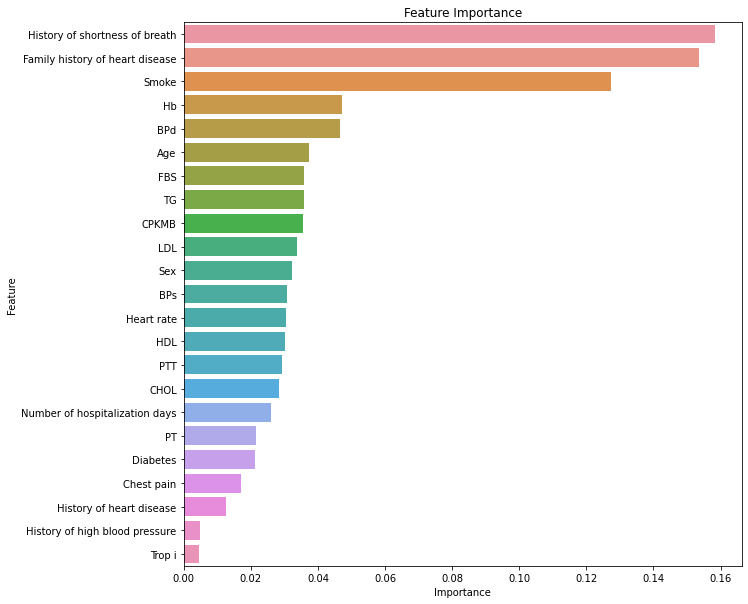

In [ ]:
#Plot the feature importances
feat_imp = pd.DataFrame(list(zip(X_train.columns, importances)), columns = ["feature", "importance"])
feat_imp = feat_imp.sort_values("importance", ascending = False).iloc[:, :]

fig, ax = plt.subplots(figsize=(10, 10))
sns.barplot(y="feature", x="importance", data=feat_imp)
ax.set_title('Feature Importance')
ax.set_xlabel('Importance')
ax.set_ylabel('Feature')

plt.show()

In [ ]:
# Forward Selection
sfs3 = SFS(MLPClassifier(), 
           k_features=15, 
           forward=True, 
           floating=False, 
           verbose=1,
           scoring='roc_auc',
           cv=10)

sfs3 = sfs3.fit(np.array(X_train), y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached a

In [ ]:
selected_feat3= X_train.columns[list(sfs3.k_feature_idx_)]
selected_feat3

Index(['Age', 'FBS', 'CHOL', 'TG', 'LDL', 'PT', 'PTT', 'BPs', 'Heart rate',
       'Diabetes', 'Smoke', 'Chest pain', 'History of shortness of breath',
       'Family history of heart disease', 'History of high blood pressure'],
      dtype='object')

In [ ]:
# Backward Elimination
sfs4 = SFS(MLPClassifier(), 
           k_features=15, 
           forward=False, 
           floating=False, 
           verbose=1,
           scoring='roc_auc',
           cv=10)

sfs4 = sfs4.fit(np.array(X_train), y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [ ]:
selected_feat4= X_train.columns[list(sfs4.k_feature_idx_)]
selected_feat4

Index(['Sex', 'FBS', 'CHOL', 'LDL', 'PT', 'PTT', 'Trop i', 'BPs', 'Heart rate',
       'Diabetes', 'Smoke', 'Chest pain', 'History of shortness of breath',
       'Family history of heart disease', 'History of high blood pressure'],
      dtype='object')

In [ ]:
# Forward Selection
sfs5 = SFS(XGBClassifier(), 
           k_features=15, 
           forward=True, 
           floating=False, 
           verbose=1,
           scoring='roc_auc',
           cv=10)

sfs5 = sfs5.fit(np.array(X_train), y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: bad input shape (232, 5)

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: bad input shape (233, 5)

  FitFailedWarning)
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/mlxtend/feature_selection/sequential_feature_selector.py:510: RuntimeWarning: Mean of empty slice
  all_avg_scores.append(np.nanmean(cv_scores))
Features: 1/15[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

In [ ]:
selected_feat5= X_train.columns[list(sfs5.k_feature_idx_)]
selected_feat5

Index(['Sex', 'Age', 'FBS', 'CHOL', 'TG', 'HDL', 'LDL', 'CPKMB', 'Hb', 'PT',
       'PTT', 'Trop i', 'BPs', 'BPd', 'Heart rate'],
      dtype='object')

In [ ]:
# Backward Elimination
sfs6 = SFS(XGBClassifier(), 
           k_features=15, 
           forward=False, 
           floating=False, 
           verbose=1,
           scoring='roc_auc',
           cv=10)

sfs6 = sfs6.fit(np.array(X_train), y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: bad input shape (232, 5)

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: bad input shape (233, 5)

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/mlxtend/feature_selection/sequential_feature_selector.py:334: RuntimeWarning: Mean of empty slice
  'avg_score': np.nanmean(k_score)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/mlxtend/feature_selection/sequential_feature_selector.py:537: RuntimeWarning: Mean of empty slic

In [ ]:
selected_feat6= X_train.columns[list(sfs6.k_feature_idx_)]
selected_feat6

Index(['Sex', 'Age', 'FBS', 'CHOL', 'TG', 'HDL', 'LDL', 'CPKMB', 'Hb', 'PT',
       'PTT', 'Trop i', 'BPs', 'BPd', 'Heart rate'],
      dtype='object')

In [ ]:
# dfada
X=dfada.drop('Target', axis=1)
y=dfada['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,
                                                    random_state=100)
X_train.shape, X_test.shape

((258, 23), (86, 23))

In [175]:
# Feature Importance
xgb = XGBClassifier()

xgb.fit(X_train, y_train)
preds = xgb.predict(X_test)
importances = xgb.feature_importances_

ValueError: y should be a 1d array, got an array of shape (258, 5) instead.

In [176]:
#Plot the feature importances
feat_imp = pd.DataFrame(list(zip(X_train.columns, importances)), columns = ["feature", "importance"])
feat_imp = feat_imp.sort_values("importance", ascending = False).iloc[:, :]

fig, ax = plt.subplots(figsize=(10, 10))
sns.barplot(y="feature", x="importance", data=feat_imp)
ax.set_title('Feature Importance')
ax.set_xlabel('Importance')
ax.set_ylabel('Feature')

plt.show()

NameError: name 'importances' is not defined

In [177]:
import numpy as np
import random
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

def calculate_fitness(features):

    X = dataset.drop('Target',axis=1)
    Y = dataset['Target']
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=100)
    clf_entropy = RandomForestClassifier()
    clf_entropy.fit(X_train, y_train)
    y_pred = clf_entropy.predict(X_test)
    return accuracy_score(y_test, y_pred) * 100

def select_mating_pool(pop, fitness, num_parents):
    # Selecting the best individuals in the current generation as parents for producing the offspring of the next generation.
    parents = np.empty((num_parents, pop.shape[1]))

    for parent_num in range(num_parents):
        max_fitness_idx = np.where(fitness == np.max(fitness))
        max_fitness_idx = max_fitness_idx[0][0]
        parents[parent_num, :] = pop[max_fitness_idx, :]
        fitness[max_fitness_idx] = -99999999999
    return parents


def crossover(parents, offspring_size):
    offspring = np.empty(offspring_size)
    # The point at which crossover takes place between two parents. Usually, it is at the center.
    #crossover_point = np.round(np.uint8(offspring_size[1]/2));
#     print("Size of offspring",offspring_size)
    crossover_point1 = random.randint(0,offspring_size[1]-44)
#     print("First cross over point",crossover_point1)
    #crossover_point2 = random.randint(crossover_point1,offspring_size[1])
    crossover_point2 = crossover_point1 + 44
#     print("Second cross over point", crossover_point2)

    for k in range(offspring_size[0]):
        # Index of the first parent to mate.
        parent1_idx = k % parents.shape[0]
        # Index of the second parent to mate.
        parent2_idx = (k+1) % parents.shape[0]
        # The new offspring will have its first half of its genes taken from the first parent.
        offspring[k, 0:crossover_point1] = parents[parent1_idx, 0:crossover_point1]
        offspring[k, (crossover_point1):(crossover_point2+1)] = parents[parent2_idx, (crossover_point1):(crossover_point2+1)]
        # The new offspring will have its second half of its genes taken from the second parent.
        offspring[k, (crossover_point2+1):(offspring_size[1]+1)] = parents[parent1_idx, (crossover_point2+1):(offspring_size[1]+1)]

    return offspring

def mutation(offspring_crossover):
    #mutations_counter = np.uint8(offspring_crossover.shape[1] / num_mutations)
    # Mutation changes a number of genes as defined by the num_mutations argument. The changes are random.
    mutation_counter = random.sample(range(offspring_crossover.shape[1]),4)
    for idx in range(offspring_crossover.shape[0]):
        for mutation_num in range(len(mutation_counter)):
            gene_idx = mutation_counter[mutation_num]
            # The random value to be added to the gene.
            if offspring_crossover[idx, gene_idx] == 1:
                offspring_crossover[idx, gene_idx] = 0
            elif offspring_crossover[idx, gene_idx] == 0:
                offspring_crossover[idx, gene_idx] = 1
    return offspring_crossover

num_weights = 132
dataset = pd.read_excel('')
feature_set = []
"""
Genetic algorithm parameters:
    Mating pool size
    Population size
"""

sol_per_pop = 100
# Creating the initial population.
#new_population = np.random.uniform(low=-4.0, high=4.0, size=pop_si
num_parents_mating = 50


# Defining the population size.
pop_size = (sol_per_pop, num_weights)  # The population will have sol_per_pop chromosome where each chromosome has
# num_weights genes.ze)
new_population = np.random.choice([0, 1], size= pop_size)
#print(new_population)

diverse_pop = np.unique(new_population, axis= 0)

best_outputs = []
num_generations = 50
mutation_rate = 0.1
mutation_generation = mutation_rate*num_generations

for generation in range(num_generations):
#     print("Generation : ", generation)
    fitNess = []
    rows = len(diverse_pop)
    cols = len(diverse_pop[0])
    # Measuring the fitness of each chromosome in the population.
    for chromosome in range(0,rows):
        feature_set = []
        for gene in range(0,cols):
            if diverse_pop[chromosome][gene] == 1:
                feature_set.append(gene)
      #  print("length of feature set: ",len(feature_set))
       # print("Elements of feature set: ", feature_set)
        fitness = calculate_fitness(feature_set)
       # print("Fitness value",fitness)
        fitNess.append(fitness)
        if(fitness == np.max(fitNess)):
            fit_chromo = chromosome

    #print("Fitness")
    #print(fitness)

    best_outputs.append(np.max(fitNess))

    best_chromosome = diverse_pop[fit_chromo]
    # The best result in the current iteration.
#     print("Best result : ", np.max(fitNess))
#     print("Best chromosome : ",best_chromosome)

    # Selecting the best parents in the population for mating.
    #print("Fitness list",fitNess)
    parents = select_mating_pool(diverse_pop, fitNess, num_parents_mating)
#     print("Parents")
#     print(parents)

    # Generating next generation using crossover.
    offspring_crossover = crossover(parents, offspring_size=(pop_size[0] - parents.shape[0], num_weights))
#     print("Crossover")

    offspring_mutation = offspring_crossover

    if(generation == mutation_generation):
        offspring_mutation = mutation(offspring_crossover)
        mutation_generation = generation+(mutation_rate*num_generations)
#         print("Mutation")
#         print(offspring_mutation)

    # Creating the new population based on the parents and offspring.
    new_population[0:parents.shape[0], :] = parents
    new_population[parents.shape[0]:, :] = offspring_mutation

    diverse_pop = np.unique(new_population, axis= 0)

# Getting the best solution after iterating finishing all generations.
# At first, the fitness is calculated for each solution in the final generation.

"""
fitNess = cal_pop_fitness(equation_inputs, new_population)
# Then return the index of that solution corresponding to the best fitness.
best_match_idx = np.where(fitness == np.max(fitness))

print("Best solution : ", new_population[best_match_idx, :])
print("Best solution fitness : ", fitness[best_match_idx])
"""
print("Best output list: ",best_outputs)
import matplotlib.pyplot as plt1

plt1.plot(best_outputs)
plt1.xlabel("Iteration")
plt1.ylabel("Fitness")
plt1.show()



FileNotFoundError: [Errno 2] No such file or directory: ''

In [178]:
import numpy as np
import random
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

def calculate_fitness(features):

    X = dataset.drop('Target',axis=1)
    Y = dataset['Target']
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=100)
    clf_entropy = AdaBoostClassifier()
    clf_entropy.fit(X_train, y_train)
    y_pred = clf_entropy.predict(X_test)
    return accuracy_score(y_test, y_pred) * 100

def select_mating_pool(pop, fitness, num_parents):
    # Selecting the best individuals in the current generation as parents for producing the offspring of the next generation.
    parents = np.empty((num_parents, pop.shape[1]))

    for parent_num in range(num_parents):
        max_fitness_idx = np.where(fitness == np.max(fitness))
        max_fitness_idx = max_fitness_idx[0][0]
        parents[parent_num, :] = pop[max_fitness_idx, :]
        fitness[max_fitness_idx] = -99999999999
    return parents


def crossover(parents, offspring_size):
    offspring = np.empty(offspring_size)
    # The point at which crossover takes place between two parents. Usually, it is at the center.
    #crossover_point = np.round(np.uint8(offspring_size[1]/2));
#     print("Size of offspring",offspring_size)
    crossover_point1 = random.randint(0,offspring_size[1]-44)
#     print("First cross over point",crossover_point1)
    #crossover_point2 = random.randint(crossover_point1,offspring_size[1])
    crossover_point2 = crossover_point1 + 44
#     print("Second cross over point", crossover_point2)

    for k in range(offspring_size[0]):
        # Index of the first parent to mate.
        parent1_idx = k % parents.shape[0]
        # Index of the second parent to mate.
        parent2_idx = (k+1) % parents.shape[0]
        # The new offspring will have its first half of its genes taken from the first parent.
        offspring[k, 0:crossover_point1] = parents[parent1_idx, 0:crossover_point1]
        offspring[k, (crossover_point1):(crossover_point2+1)] = parents[parent2_idx, (crossover_point1):(crossover_point2+1)]
        # The new offspring will have its second half of its genes taken from the second parent.
        offspring[k, (crossover_point2+1):(offspring_size[1]+1)] = parents[parent1_idx, (crossover_point2+1):(offspring_size[1]+1)]

    return offspring

def mutation(offspring_crossover):
    #mutations_counter = np.uint8(offspring_crossover.shape[1] / num_mutations)
    # Mutation changes a number of genes as defined by the num_mutations argument. The changes are random.
    mutation_counter = random.sample(range(offspring_crossover.shape[1]),4)
    for idx in range(offspring_crossover.shape[0]):
        for mutation_num in range(len(mutation_counter)):
            gene_idx = mutation_counter[mutation_num]
            # The random value to be added to the gene.
            if offspring_crossover[idx, gene_idx] == 1:
                offspring_crossover[idx, gene_idx] = 0
            elif offspring_crossover[idx, gene_idx] == 0:
                offspring_crossover[idx, gene_idx] = 1
    return offspring_crossover

num_weights = 132
dataset = pd.read_excel('Actual Data_BalanceData_Adasyn.xlsx')
feature_set = []
"""
Genetic algorithm parameters:
    Mating pool size
    Population size
"""

sol_per_pop = 100
# Creating the initial population.
#new_population = np.random.uniform(low=-4.0, high=4.0, size=pop_si
num_parents_mating = 50


# Defining the population size.
pop_size = (sol_per_pop, num_weights)  # The population will have sol_per_pop chromosome where each chromosome has
# num_weights genes.ze)
new_population = np.random.choice([0, 1], size= pop_size)
#print(new_population)

diverse_pop = np.unique(new_population, axis= 0)

best_outputs = []
num_generations = 50
mutation_rate = 0.1
mutation_generation = mutation_rate*num_generations

for generation in range(num_generations):
#     print("Generation : ", generation)
    fitNess = []
    rows = len(diverse_pop)
    cols = len(diverse_pop[0])
    # Measuring the fitness of each chromosome in the population.
    for chromosome in range(0,rows):
        feature_set = []
        for gene in range(0,cols):
            if diverse_pop[chromosome][gene] == 1:
                feature_set.append(gene)
      #  print("length of feature set: ",len(feature_set))
       # print("Elements of feature set: ", feature_set)
        fitness = calculate_fitness(feature_set)
       # print("Fitness value",fitness)
        fitNess.append(fitness)
        if(fitness == np.max(fitNess)):
            fit_chromo = chromosome

    #print("Fitness")
    #print(fitness)

    best_outputs.append(np.max(fitNess))

    best_chromosome = diverse_pop[fit_chromo]
    # The best result in the current iteration.
#     print("Best result : ", np.max(fitNess))
#     print("Best chromosome : ",best_chromosome)

    # Selecting the best parents in the population for mating.
    #print("Fitness list",fitNess)
    parents = select_mating_pool(diverse_pop, fitNess, num_parents_mating)
#     print("Parents")
#     print(parents)

    # Generating next generation using crossover.
    offspring_crossover = crossover(parents, offspring_size=(pop_size[0] - parents.shape[0], num_weights))
#     print("Crossover")

    offspring_mutation = offspring_crossover

    if(generation == mutation_generation):
        offspring_mutation = mutation(offspring_crossover)
        mutation_generation = generation+(mutation_rate*num_generations)
#         print("Mutation")
#         print(offspring_mutation)

    # Creating the new population based on the parents and offspring.
    new_population[0:parents.shape[0], :] = parents
    new_population[parents.shape[0]:, :] = offspring_mutation

    diverse_pop = np.unique(new_population, axis= 0)

# Getting the best solution after iterating finishing all generations.
# At first, the fitness is calculated for each solution in the final generation.

"""
fitNess = cal_pop_fitness(equation_inputs, new_population)
# Then return the index of that solution corresponding to the best fitness.
best_match_idx = np.where(fitness == np.max(fitness))

print("Best solution : ", new_population[best_match_idx, :])
print("Best solution fitness : ", fitness[best_match_idx])
"""
print("Best output list: ",best_outputs)
import matplotlib.pyplot as plt1

plt1.plot(best_outputs)
plt1.xlabel("Iteration")
plt1.ylabel("Fitness")
plt1.show()



ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



KeyboardInterrupt: 

In [ ]:
import numpy as np
import random
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

def calculate_fitness(features):

    X = dataset.drop('Target',axis=1)
    Y = dataset['Target']
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=100)
    clf_entropy = GradientBoostingClassifier()
    clf_entropy.fit(X_train, y_train)
    y_pred = clf_entropy.predict(X_test)
    return accuracy_score(y_test, y_pred) * 100

def select_mating_pool(pop, fitness, num_parents):
    # Selecting the best individuals in the current generation as parents for producing the offspring of the next generation.
    parents = np.empty((num_parents, pop.shape[1]))

    for parent_num in range(num_parents):
        max_fitness_idx = np.where(fitness == np.max(fitness))
        max_fitness_idx = max_fitness_idx[0][0]
        parents[parent_num, :] = pop[max_fitness_idx, :]
        fitness[max_fitness_idx] = -99999999999
    return parents


def crossover(parents, offspring_size):
    offspring = np.empty(offspring_size)
    # The point at which crossover takes place between two parents. Usually, it is at the center.
    #crossover_point = np.round(np.uint8(offspring_size[1]/2));
#     print("Size of offspring",offspring_size)
    crossover_point1 = random.randint(0,offspring_size[1]-44)
#     print("First cross over point",crossover_point1)
    #crossover_point2 = random.randint(crossover_point1,offspring_size[1])
    crossover_point2 = crossover_point1 + 44
#     print("Second cross over point", crossover_point2)

    for k in range(offspring_size[0]):
        # Index of the first parent to mate.
        parent1_idx = k % parents.shape[0]
        # Index of the second parent to mate.
        parent2_idx = (k+1) % parents.shape[0]
        # The new offspring will have its first half of its genes taken from the first parent.
        offspring[k, 0:crossover_point1] = parents[parent1_idx, 0:crossover_point1]
        offspring[k, (crossover_point1):(crossover_point2+1)] = parents[parent2_idx, (crossover_point1):(crossover_point2+1)]
        # The new offspring will have its second half of its genes taken from the second parent.
        offspring[k, (crossover_point2+1):(offspring_size[1]+1)] = parents[parent1_idx, (crossover_point2+1):(offspring_size[1]+1)]

    return offspring

def mutation(offspring_crossover):
    #mutations_counter = np.uint8(offspring_crossover.shape[1] / num_mutations)
    # Mutation changes a number of genes as defined by the num_mutations argument. The changes are random.
    mutation_counter = random.sample(range(offspring_crossover.shape[1]),4)
    for idx in range(offspring_crossover.shape[0]):
        for mutation_num in range(len(mutation_counter)):
            gene_idx = mutation_counter[mutation_num]
            # The random value to be added to the gene.
            if offspring_crossover[idx, gene_idx] == 1:
                offspring_crossover[idx, gene_idx] = 0
            elif offspring_crossover[idx, gene_idx] == 0:
                offspring_crossover[idx, gene_idx] = 1
    return offspring_crossover

num_weights = 132
dataset = pd.read_excel('Actual Data_BalanceData_Adasyn.xlsx')
feature_set = []
"""
Genetic algorithm parameters:
    Mating pool size
    Population size
"""

sol_per_pop = 100
# Creating the initial population.
#new_population = np.random.uniform(low=-4.0, high=4.0, size=pop_si
num_parents_mating = 50


# Defining the population size.
pop_size = (sol_per_pop, num_weights)  # The population will have sol_per_pop chromosome where each chromosome has
# num_weights genes.ze)
new_population = np.random.choice([0, 1], size= pop_size)
#print(new_population)

diverse_pop = np.unique(new_population, axis= 0)

best_outputs = []
num_generations = 50
mutation_rate = 0.1
mutation_generation = mutation_rate*num_generations

for generation in range(num_generations):
    print("Generation : ", generation)
    fitNess = []
    rows = len(diverse_pop)
    cols = len(diverse_pop[0])
    # Measuring the fitness of each chromosome in the population.
    for chromosome in range(0,rows):
        feature_set = []
        for gene in range(0,cols):
            if diverse_pop[chromosome][gene] == 1:
                feature_set.append(gene)
      #  print("length of feature set: ",len(feature_set))
       # print("Elements of feature set: ", feature_set)
        fitness = calculate_fitness(feature_set)
       # print("Fitness value",fitness)
        fitNess.append(fitness)
        if(fitness == np.max(fitNess)):
            fit_chromo = chromosome

    #print("Fitness")
    #print(fitness)

    best_outputs.append(np.max(fitNess))

    best_chromosome = diverse_pop[fit_chromo]
    # The best result in the current iteration.
#     print("Best result : ", np.max(fitNess))
#     print("Best chromosome : ",best_chromosome)

    # Selecting the best parents in the population for mating.
    #print("Fitness list",fitNess)
    parents = select_mating_pool(diverse_pop, fitNess, num_parents_mating)
#     print("Parents")
#     print(parents)

    # Generating next generation using crossover.
    offspring_crossover = crossover(parents, offspring_size=(pop_size[0] - parents.shape[0], num_weights))
#     print("Crossover")

    offspring_mutation = offspring_crossover

    if(generation == mutation_generation):
        offspring_mutation = mutation(offspring_crossover)
        mutation_generation = generation+(mutation_rate*num_generations)
#         print("Mutation")
#         print(offspring_mutation)

    # Creating the new population based on the parents and offspring.
    new_population[0:parents.shape[0], :] = parents
    new_population[parents.shape[0]:, :] = offspring_mutation

    diverse_pop = np.unique(new_population, axis= 0)

# Getting the best solution after iterating finishing all generations.
# At first, the fitness is calculated for each solution in the final generation.

"""
fitNess = cal_pop_fitness(equation_inputs, new_population)
# Then return the index of that solution corresponding to the best fitness.
best_match_idx = np.where(fitness == np.max(fitness))

print("Best solution : ", new_population[best_match_idx, :])
print("Best solution fitness : ", fitness[best_match_idx])
"""
print("Best output list: ",best_outputs)
import matplotlib.pyplot as plt1

plt1.plot(best_outputs)
plt1.xlabel("Iteration")
plt1.ylabel("Fitness")
plt1.show()



In [ ]:
import numpy as np
import random
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

def calculate_fitness(features):

    X = dataset.drop('Target',axis=1)
    Y = dataset['Target']
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=100)
    clf_entropy = XGBClassifier()
    clf_entropy.fit(X_train, y_train)
    y_pred = clf_entropy.predict(X_test)
    return accuracy_score(y_test, y_pred) * 100

def select_mating_pool(pop, fitness, num_parents):
    # Selecting the best individuals in the current generation as parents for producing the offspring of the next generation.
    parents = np.empty((num_parents, pop.shape[1]))

    for parent_num in range(num_parents):
        max_fitness_idx = np.where(fitness == np.max(fitness))
        max_fitness_idx = max_fitness_idx[0][0]
        parents[parent_num, :] = pop[max_fitness_idx, :]
        fitness[max_fitness_idx] = -99999999999
    return parents


def crossover(parents, offspring_size):
    offspring = np.empty(offspring_size)
    # The point at which crossover takes place between two parents. Usually, it is at the center.
    #crossover_point = np.round(np.uint8(offspring_size[1]/2));
#     print("Size of offspring",offspring_size)
    crossover_point1 = random.randint(0,offspring_size[1]-44)
#     print("First cross over point",crossover_point1)
    #crossover_point2 = random.randint(crossover_point1,offspring_size[1])
    crossover_point2 = crossover_point1 + 44
#     print("Second cross over point", crossover_point2)

    for k in range(offspring_size[0]):
        # Index of the first parent to mate.
        parent1_idx = k % parents.shape[0]
        # Index of the second parent to mate.
        parent2_idx = (k+1) % parents.shape[0]
        # The new offspring will have its first half of its genes taken from the first parent.
        offspring[k, 0:crossover_point1] = parents[parent1_idx, 0:crossover_point1]
        offspring[k, (crossover_point1):(crossover_point2+1)] = parents[parent2_idx, (crossover_point1):(crossover_point2+1)]
        # The new offspring will have its second half of its genes taken from the second parent.
        offspring[k, (crossover_point2+1):(offspring_size[1]+1)] = parents[parent1_idx, (crossover_point2+1):(offspring_size[1]+1)]

    return offspring

def mutation(offspring_crossover):
    #mutations_counter = np.uint8(offspring_crossover.shape[1] / num_mutations)
    # Mutation changes a number of genes as defined by the num_mutations argument. The changes are random.
    mutation_counter = random.sample(range(offspring_crossover.shape[1]),4)
    for idx in range(offspring_crossover.shape[0]):
        for mutation_num in range(len(mutation_counter)):
            gene_idx = mutation_counter[mutation_num]
            # The random value to be added to the gene.
            if offspring_crossover[idx, gene_idx] == 1:
                offspring_crossover[idx, gene_idx] = 0
            elif offspring_crossover[idx, gene_idx] == 0:
                offspring_crossover[idx, gene_idx] = 1
    return offspring_crossover

num_weights = 132
dataset = pd.read_excel('Actual Data_BalanceData_Adasyn.xlsx')
feature_set = []
"""
Genetic algorithm parameters:
    Mating pool size
    Population size
"""

sol_per_pop = 100
# Creating the initial population.
#new_population = np.random.uniform(low=-4.0, high=4.0, size=pop_si
num_parents_mating = 50


# Defining the population size.
pop_size = (sol_per_pop, num_weights)  # The population will have sol_per_pop chromosome where each chromosome has
# num_weights genes.ze)
new_population = np.random.choice([0, 1], size= pop_size)
#print(new_population)

diverse_pop = np.unique(new_population, axis= 0)

best_outputs = []
num_generations = 50
mutation_rate = 0.1
mutation_generation = mutation_rate*num_generations

for generation in range(num_generations):
#     print("Generation : ", generation)
    fitNess = []
    rows = len(diverse_pop)
    cols = len(diverse_pop[0])
    # Measuring the fitness of each chromosome in the population.
    for chromosome in range(0,rows):
        feature_set = []
        for gene in range(0,cols):
            if diverse_pop[chromosome][gene] == 1:
                feature_set.append(gene)
      #  print("length of feature set: ",len(feature_set))
       # print("Elements of feature set: ", feature_set)
        fitness = calculate_fitness(feature_set)
       # print("Fitness value",fitness)
        fitNess.append(fitness)
        if(fitness == np.max(fitNess)):
            fit_chromo = chromosome

    #print("Fitness")
    #print(fitness)

    best_outputs.append(np.max(fitNess))

    best_chromosome = diverse_pop[fit_chromo]
    # The best result in the current iteration.
#     print("Best result : ", np.max(fitNess))
#     print("Best chromosome : ",best_chromosome)

    # Selecting the best parents in the population for mating.
    #print("Fitness list",fitNess)
    parents = select_mating_pool(diverse_pop, fitNess, num_parents_mating)
#     print("Parents")
#     print(parents)

    # Generating next generation using crossover.
    offspring_crossover = crossover(parents, offspring_size=(pop_size[0] - parents.shape[0], num_weights))
#     print("Crossover")

    offspring_mutation = offspring_crossover

    if(generation == mutation_generation):
        offspring_mutation = mutation(offspring_crossover)
        mutation_generation = generation+(mutation_rate*num_generations)
#         print("Mutation")
#         print(offspring_mutation)

    # Creating the new population based on the parents and offspring.
    new_population[0:parents.shape[0], :] = parents
    new_population[parents.shape[0]:, :] = offspring_mutation

    diverse_pop = np.unique(new_population, axis= 0)

# Getting the best solution after iterating finishing all generations.
# At first, the fitness is calculated for each solution in the final generation.

"""
fitNess = cal_pop_fitness(equation_inputs, new_population)
# Then return the index of that solution corresponding to the best fitness.
best_match_idx = np.where(fitness == np.max(fitness))

print("Best solution : ", new_population[best_match_idx, :])
print("Best solution fitness : ", fitness[best_match_idx])
"""
print("Best output list: ",best_outputs)
import matplotlib.pyplot as plt1

plt1.plot(best_outputs)
plt1.xlabel("Iteration")
plt1.ylabel("Fitness")
plt1.show()



In [ ]:
import numpy as np
import random
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier


def calculate_fitness(features):

    X = dataset.drop('Target',axis=1)
    Y = dataset['Target']
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=100)
    clf_entropy = MLPClassifier()
    clf_entropy.fit(X_train, y_train)
    y_pred = clf_entropy.predict(X_test)
    return accuracy_score(y_test, y_pred) * 100

def select_mating_pool(pop, fitness, num_parents):
    # Selecting the best individuals in the current generation as parents for producing the offspring of the next generation.
    parents = np.empty((num_parents, pop.shape[1]))

    for parent_num in range(num_parents):
        max_fitness_idx = np.where(fitness == np.max(fitness))
        max_fitness_idx = max_fitness_idx[0][0]
        parents[parent_num, :] = pop[max_fitness_idx, :]
        fitness[max_fitness_idx] = -99999999999
    return parents


def crossover(parents, offspring_size):
    offspring = np.empty(offspring_size)
    # The point at which crossover takes place between two parents. Usually, it is at the center.
    #crossover_point = np.round(np.uint8(offspring_size[1]/2));
    print("Size of offspring",offspring_size)
    crossover_point1 = random.randint(0,offspring_size[1]-44)
    print("First cross over point",crossover_point1)
    #crossover_point2 = random.randint(crossover_point1,offspring_size[1])
    crossover_point2 = crossover_point1 + 44
    print("Second cross over point", crossover_point2)

    for k in range(offspring_size[0]):
        # Index of the first parent to mate.
        parent1_idx = k % parents.shape[0]
        # Index of the second parent to mate.
        parent2_idx = (k+1) % parents.shape[0]
        # The new offspring will have its first half of its genes taken from the first parent.
        offspring[k, 0:crossover_point1] = parents[parent1_idx, 0:crossover_point1]
        offspring[k, (crossover_point1):(crossover_point2+1)] = parents[parent2_idx, (crossover_point1):(crossover_point2+1)]
        # The new offspring will have its second half of its genes taken from the second parent.
        offspring[k, (crossover_point2+1):(offspring_size[1]+1)] = parents[parent1_idx, (crossover_point2+1):(offspring_size[1]+1)]

    return offspring

def mutation(offspring_crossover):
    #mutations_counter = np.uint8(offspring_crossover.shape[1] / num_mutations)
    # Mutation changes a number of genes as defined by the num_mutations argument. The changes are random.
    mutation_counter = random.sample(range(offspring_crossover.shape[1]),4)
    for idx in range(offspring_crossover.shape[0]):
        for mutation_num in range(len(mutation_counter)):
            gene_idx = mutation_counter[mutation_num]
            # The random value to be added to the gene.
            if offspring_crossover[idx, gene_idx] == 1:
                offspring_crossover[idx, gene_idx] = 0
            elif offspring_crossover[idx, gene_idx] == 0:
                offspring_crossover[idx, gene_idx] = 1
    return offspring_crossover

num_weights = 132
dataset = pd.read_excel('Actual Data_BalanceData_Adasyn.xlsx')
feature_set = []
"""
Genetic algorithm parameters:
    Mating pool size
    Population size
"""

sol_per_pop = 100
# Creating the initial population.
#new_population = np.random.uniform(low=-4.0, high=4.0, size=pop_si
num_parents_mating = 50


# Defining the population size.
pop_size = (sol_per_pop, num_weights)  # The population will have sol_per_pop chromosome where each chromosome has
# num_weights genes.ze)
new_population = np.random.choice([0, 1], size= pop_size)
#print(new_population)

diverse_pop = np.unique(new_population, axis= 0)

best_outputs = []
num_generations = 50
mutation_rate = 0.1
mutation_generation = mutation_rate*num_generations

for generation in range(num_generations):
    print("Generation : ", generation)
    fitNess = []
    rows = len(diverse_pop)
    cols = len(diverse_pop[0])
    # Measuring the fitness of each chromosome in the population.
    for chromosome in range(0,rows):
        feature_set = []
        for gene in range(0,cols):
            if diverse_pop[chromosome][gene] == 1:
                feature_set.append(gene)
      #  print("length of feature set: ",len(feature_set))
       # print("Elements of feature set: ", feature_set)
        fitness = calculate_fitness(feature_set)
       # print("Fitness value",fitness)
        fitNess.append(fitness)
        if(fitness == np.max(fitNess)):
            fit_chromo = chromosome

    #print("Fitness")
    #print(fitness)

    best_outputs.append(np.max(fitNess))

    best_chromosome = diverse_pop[fit_chromo]
    # The best result in the current iteration.
    print("Best result : ", np.max(fitNess))
    print("Best chromosome : ",best_chromosome)

    # Selecting the best parents in the population for mating.
    #print("Fitness list",fitNess)
    parents = select_mating_pool(diverse_pop, fitNess, num_parents_mating)
    print("Parents")
    print(parents)

    # Generating next generation using crossover.
    offspring_crossover = crossover(parents, offspring_size=(pop_size[0] - parents.shape[0], num_weights))
    print("Crossover")

    offspring_mutation = offspring_crossover

    if(generation == mutation_generation):
        offspring_mutation = mutation(offspring_crossover)
        mutation_generation = generation+(mutation_rate*num_generations)
        print("Mutation")
        print(offspring_mutation)

    # Creating the new population based on the parents and offspring.
    new_population[0:parents.shape[0], :] = parents
    new_population[parents.shape[0]:, :] = offspring_mutation

    diverse_pop = np.unique(new_population, axis= 0)

# Getting the best solution after iterating finishing all generations.
# At first, the fitness is calculated for each solution in the final generation.

"""
fitNess = cal_pop_fitness(equation_inputs, new_population)
# Then return the index of that solution corresponding to the best fitness.
best_match_idx = np.where(fitness == np.max(fitness))

print("Best solution : ", new_population[best_match_idx, :])
print("Best solution fitness : ", fitness[best_match_idx])
"""
print("Best output list: ",best_outputs)
import matplotlib.pyplot as plt1

plt1.plot(best_outputs)
plt1.xlabel("Iteration")
plt1.ylabel("Fitness")
plt1.show()



In [ ]:
# dfSM
X=dfsm.drop('Target', axis=1)
y=dfsm['Target']
from sklearn import preprocessing
y = preprocessing.label_binarize(y, classes=[1, 2, 3, 4, 5])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,
                                                    random_state=100)
X_train.shape, X_test.shape

((270, 23), (90, 23))

In [ ]:
# forward selection
sfs1 = SFS(RandomForestClassifier(n_jobs=-1,n_estimators=200,max_depth=12), 
           k_features=15, 
           forward=True, 
           floating=False, 
           verbose=1,
           scoring='roc_auc',
           cv=5)

sfs1 = sfs1.fit(np.array(X_train), y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:  1.1min finished
Features: 1/15[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:  1.0min finished
Features: 2/15[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:   57.9s finished
Features: 3/15[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:   55.0s finished
Features: 4/15[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:   52.4s finished
Features: 5/15[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:   51.1s finished
Features: 6/15[Parallel(

In [ ]:
selected_feat1= X_train.columns[list(sfs1.k_feature_idx_)]
selected_feat1

Index(['Sex', 'FBS', 'CHOL', 'Hb', 'PTT', 'Trop i', 'BPd', 'Heart rate',
       'Diabetes', 'Smoke', 'Chest pain', 'History of shortness of breath',
       'History of heart disease', 'Family history of heart disease',
       'History of high blood pressure'],
      dtype='object')

In [ ]:
# Backward Elimination
sfs2 = SFS(RandomForestClassifier(n_jobs=-1,n_estimators=200,max_depth=12), 
           k_features=15, 
           forward=False, 
           floating=False, 
           verbose=1,
           scoring='roc_auc',
           cv=10)

sfs2 = sfs2.fit(np.array(X_train), y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:  2.3min finished
Features: 22/15[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:  2.2min finished
Features: 21/15[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:  2.1min finished
Features: 20/15[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  2.0min finished
Features: 19/15[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:  1.9min finished
Features: 18/15[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:  1.8min finished
Features: 17/15[Par

In [ ]:
selected_feat2= X_train.columns[list(sfs2.k_feature_idx_)]
selected_feat2

Index(['Sex', 'FBS', 'CHOL', 'TG', 'LDL', 'CPKMB', 'Hb', 'Trop i',
       'Heart rate', 'Diabetes', 'Smoke', 'Chest pain',
       'History of shortness of breath', 'Family history of heart disease',
       'History of high blood pressure'],
      dtype='object')

In [ ]:
# Feature Importance
forest = RandomForestClassifier(n_jobs=-1, n_estimators=1000, max_depth=12,
                              random_state=10)

forest.fit(X_train, y_train)
preds = forest.predict(X_test)
importances = forest.feature_importances_

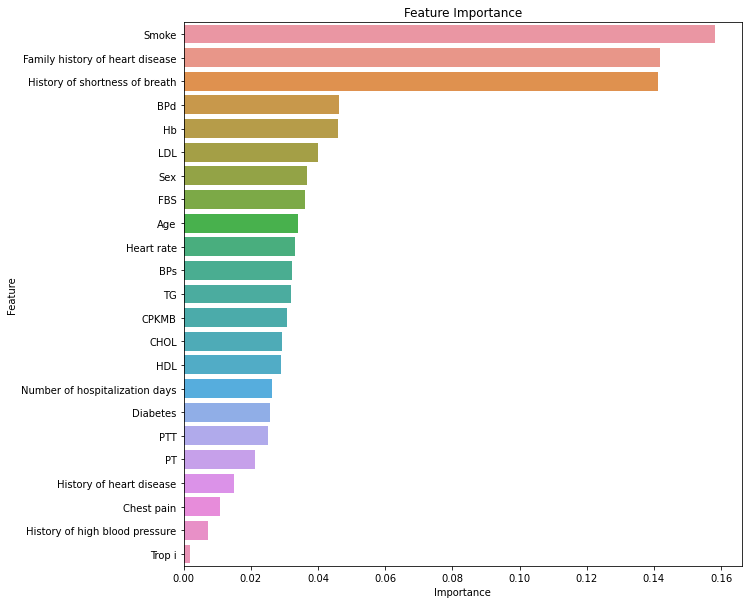

In [ ]:
#Plot the feature importances
feat_imp = pd.DataFrame(list(zip(X_train.columns, importances)), columns = ["feature", "importance"])
feat_imp = feat_imp.sort_values("importance", ascending = False).iloc[:, :]

fig, ax = plt.subplots(figsize=(10, 10))
sns.barplot(y="feature", x="importance", data=feat_imp)
ax.set_title('Feature Importance')
ax.set_xlabel('Importance')
ax.set_ylabel('Feature')

plt.show()

In [ ]:
# Forward Selection
sfs3 = SFS(MLPClassifier(), 
           k_features=15, 
           forward=True, 
           floating=False, 
           verbose=1,
           scoring='roc_auc',
           cv=10)

sfs3 = sfs3.fit(np.array(X_train), y_train)

In [ ]:
selected_feat3= X_train.columns[list(sfs3.k_feature_idx_)]
selected_feat3

Index(['Age', 'FBS', 'CHOL', 'TG', 'HDL', 'LDL', 'PTT', 'Trop i', 'Heart rate',
       'Diabetes', 'Smoke', 'Chest pain', 'History of shortness of breath',
       'Family history of heart disease', 'Number of hospitalization days'],
      dtype='object')

In [ ]:
# Backward Elimination
sfs4 = SFS(MLPClassifier(), 
           k_features=15, 
           forward=False, 
           floating=False, 
           verbose=1,
           scoring='roc_auc',
           cv=10)

sfs4 = sfs4.fit(np.array(X_train), y_train)

In [ ]:
selected_feat4= X_train.columns[list(sfs4.k_feature_idx_)]
selected_feat4

Index(['FBS', 'CHOL', 'CPKMB', 'Hb', 'PTT', 'Trop i', 'BPs', 'BPd',
       'Heart rate', 'Diabetes', 'Smoke', 'Chest pain',
       'History of shortness of breath', 'Family history of heart disease',
       'Number of hospitalization days'],
      dtype='object')

In [ ]:
# Forward Selection
sfs5 = SFS(XGBClassifier(), 
           k_features=15, 
           forward=True, 
           floating=False, 
           verbose=1,
           scoring='roc_auc',
           cv=10)

sfs5 = sfs5.fit(np.array(X_train), y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: bad input shape (243, 5)

  FitFailedWarning)
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/mlxtend/feature_selection/sequential_feature_selector.py:510: RuntimeWarning: Mean of empty slice
  all_avg_scores.append(np.nanmean(cv_scores))
Features: 1/15[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:    0.1s finished
Features: 2/15[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    0.2s finished
Features: 3/15[Parallel(n_jobs=1)]: Using backend SequentialBack

In [ ]:
selected_feat5= X_train.columns[list(sfs5.k_feature_idx_)]
selected_feat5

Index(['Sex', 'Age', 'FBS', 'CHOL', 'TG', 'HDL', 'LDL', 'CPKMB', 'Hb', 'PT',
       'PTT', 'Trop i', 'BPs', 'BPd', 'Heart rate'],
      dtype='object')

In [ ]:
# Backward Elimination
sfs6 = SFS(XGBClassifier(), 
           k_features=15, 
           forward=False, 
           floating=False, 
           verbose=1,
           scoring='roc_auc',
           cv=10)

sfs6 = sfs6.fit(np.array(X_train), y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: bad input shape (243, 5)

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/mlxtend/feature_selection/sequential_feature_selector.py:334: RuntimeWarning: Mean of empty slice
  'avg_score': np.nanmean(k_score)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/mlxtend/feature_selection/sequential_feature_selector.py:537: RuntimeWarning: Mean of empty slice
  all_avg_scores.append(np.nanmean(cv_scores))
Features: 22/15[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:    0.2s finished
Features: 21/15[Parallel(n_jobs=1)]: Using backend Seque

In [ ]:
selected_feat6= X_train.columns[list(sfs6.k_feature_idx_)]
selected_feat6

Index(['Sex', 'Age', 'FBS', 'CHOL', 'TG', 'HDL', 'LDL', 'CPKMB', 'Hb', 'PT',
       'PTT', 'Trop i', 'BPs', 'BPd', 'Heart rate'],
      dtype='object')

In [ ]:
# dfsm
X=dfsm.drop('Target', axis=1)
y=dfsm['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,
                                                    random_state=100)
X_train.shape, X_test.shape

((270, 23), (90, 23))

In [ ]:
# Feature Importance
xgb = XGBClassifier()

xgb.fit(X_train, y_train)
preds = xgb.predict(X_test)
importances = xgb.feature_importances_

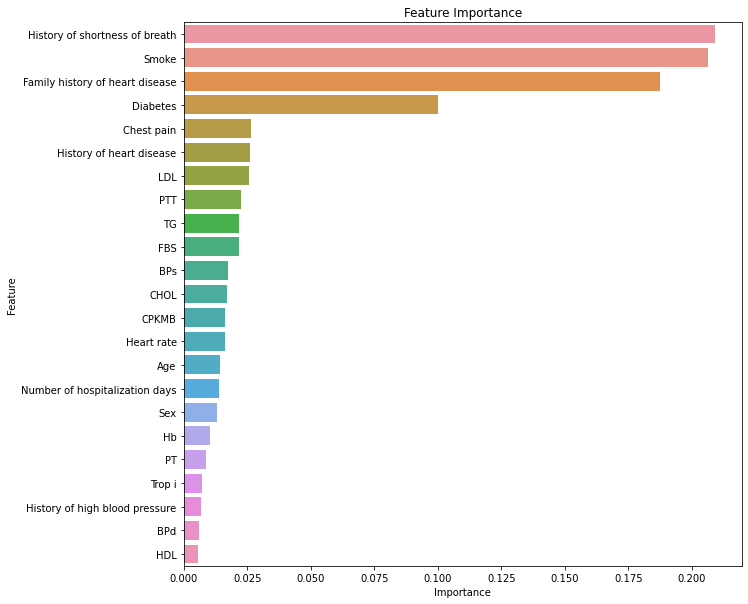

In [ ]:
#Plot the feature importances
feat_imp = pd.DataFrame(list(zip(X_train.columns, importances)), columns = ["feature", "importance"])
feat_imp = feat_imp.sort_values("importance", ascending = False).iloc[:, :]

fig, ax = plt.subplots(figsize=(10, 10))
sns.barplot(y="feature", x="importance", data=feat_imp)
ax.set_title('Feature Importance')
ax.set_xlabel('Importance')
ax.set_ylabel('Feature')

plt.show()

In [ ]:
import numpy as np
import random
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

def calculate_fitness(features):

    X = dataset.drop('Target',axis=1)
    Y = dataset['Target']
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=100)
    clf_entropy = RandomForestClassifier()
    clf_entropy.fit(X_train, y_train)
    y_pred = clf_entropy.predict(X_test)
    return accuracy_score(y_test, y_pred) * 100

def select_mating_pool(pop, fitness, num_parents):
    # Selecting the best individuals in the current generation as parents for producing the offspring of the next generation.
    parents = np.empty((num_parents, pop.shape[1]))

    for parent_num in range(num_parents):
        max_fitness_idx = np.where(fitness == np.max(fitness))
        max_fitness_idx = max_fitness_idx[0][0]
        parents[parent_num, :] = pop[max_fitness_idx, :]
        fitness[max_fitness_idx] = -99999999999
    return parents


def crossover(parents, offspring_size):
    offspring = np.empty(offspring_size)
    # The point at which crossover takes place between two parents. Usually, it is at the center.
    #crossover_point = np.round(np.uint8(offspring_size[1]/2));
    print("Size of offspring",offspring_size)
    crossover_point1 = random.randint(0,offspring_size[1]-44)
    print("First cross over point",crossover_point1)
    #crossover_point2 = random.randint(crossover_point1,offspring_size[1])
    crossover_point2 = crossover_point1 + 44
    print("Second cross over point", crossover_point2)

    for k in range(offspring_size[0]):
        # Index of the first parent to mate.
        parent1_idx = k % parents.shape[0]
        # Index of the second parent to mate.
        parent2_idx = (k+1) % parents.shape[0]
        # The new offspring will have its first half of its genes taken from the first parent.
        offspring[k, 0:crossover_point1] = parents[parent1_idx, 0:crossover_point1]
        offspring[k, (crossover_point1):(crossover_point2+1)] = parents[parent2_idx, (crossover_point1):(crossover_point2+1)]
        # The new offspring will have its second half of its genes taken from the second parent.
        offspring[k, (crossover_point2+1):(offspring_size[1]+1)] = parents[parent1_idx, (crossover_point2+1):(offspring_size[1]+1)]

    return offspring

def mutation(offspring_crossover):
    #mutations_counter = np.uint8(offspring_crossover.shape[1] / num_mutations)
    # Mutation changes a number of genes as defined by the num_mutations argument. The changes are random.
    mutation_counter = random.sample(range(offspring_crossover.shape[1]),4)
    for idx in range(offspring_crossover.shape[0]):
        for mutation_num in range(len(mutation_counter)):
            gene_idx = mutation_counter[mutation_num]
            # The random value to be added to the gene.
            if offspring_crossover[idx, gene_idx] == 1:
                offspring_crossover[idx, gene_idx] = 0
            elif offspring_crossover[idx, gene_idx] == 0:
                offspring_crossover[idx, gene_idx] = 1
    return offspring_crossover

num_weights = 132
dataset = pd.read_excel('/content/Actual Data_After Outlier Detection_SMOTE_SS.xlsx')
feature_set = []
"""
Genetic algorithm parameters:
    Mating pool size
    Population size
"""

sol_per_pop = 100
# Creating the initial population.
#new_population = np.random.uniform(low=-4.0, high=4.0, size=pop_si
num_parents_mating = 50


# Defining the population size.
pop_size = (sol_per_pop, num_weights)  # The population will have sol_per_pop chromosome where each chromosome has
# num_weights genes.ze)
new_population = np.random.choice([0, 1], size= pop_size)
#print(new_population)

diverse_pop = np.unique(new_population, axis= 0)

best_outputs = []
num_generations = 50
mutation_rate = 0.1
mutation_generation = mutation_rate*num_generations

for generation in range(num_generations):
    print("Generation : ", generation)
    fitNess = []
    rows = len(diverse_pop)
    cols = len(diverse_pop[0])
    # Measuring the fitness of each chromosome in the population.
    for chromosome in range(0,rows):
        feature_set = []
        for gene in range(0,cols):
            if diverse_pop[chromosome][gene] == 1:
                feature_set.append(gene)
      #  print("length of feature set: ",len(feature_set))
       # print("Elements of feature set: ", feature_set)
        fitness = calculate_fitness(feature_set)
       # print("Fitness value",fitness)
        fitNess.append(fitness)
        if(fitness == np.max(fitNess)):
            fit_chromo = chromosome

    #print("Fitness")
    #print(fitness)

    best_outputs.append(np.max(fitNess))

    best_chromosome = diverse_pop[fit_chromo]
    # The best result in the current iteration.
    print("Best result : ", np.max(fitNess))
    print("Best chromosome : ",best_chromosome)

    # Selecting the best parents in the population for mating.
    #print("Fitness list",fitNess)
    parents = select_mating_pool(diverse_pop, fitNess, num_parents_mating)
    print("Parents")
    print(parents)

    # Generating next generation using crossover.
    offspring_crossover = crossover(parents, offspring_size=(pop_size[0] - parents.shape[0], num_weights))
    print("Crossover")

    offspring_mutation = offspring_crossover

    if(generation == mutation_generation):
        offspring_mutation = mutation(offspring_crossover)
        mutation_generation = generation+(mutation_rate*num_generations)
        print("Mutation")
        print(offspring_mutation)

    # Creating the new population based on the parents and offspring.
    new_population[0:parents.shape[0], :] = parents
    new_population[parents.shape[0]:, :] = offspring_mutation

    diverse_pop = np.unique(new_population, axis= 0)

# Getting the best solution after iterating finishing all generations.
# At first, the fitness is calculated for each solution in the final generation.

"""
fitNess = cal_pop_fitness(equation_inputs, new_population)
# Then return the index of that solution corresponding to the best fitness.
best_match_idx = np.where(fitness == np.max(fitness))

print("Best solution : ", new_population[best_match_idx, :])
print("Best solution fitness : ", fitness[best_match_idx])
"""
print("Best output list: ",best_outputs)
import matplotlib.pyplot as plt1

plt1.plot(best_outputs)
plt1.xlabel("Iteration")
plt1.ylabel("Fitness")
plt1.show()



In [ ]:
import numpy as np
import random
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

def calculate_fitness(features):

    X = dataset.drop('Target',axis=1)
    Y = dataset['Target']
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=100)
    clf_entropy = AdaBoostClassifier()
    clf_entropy.fit(X_train, y_train)
    y_pred = clf_entropy.predict(X_test)
    return accuracy_score(y_test, y_pred) * 100

def select_mating_pool(pop, fitness, num_parents):
    # Selecting the best individuals in the current generation as parents for producing the offspring of the next generation.
    parents = np.empty((num_parents, pop.shape[1]))

    for parent_num in range(num_parents):
        max_fitness_idx = np.where(fitness == np.max(fitness))
        max_fitness_idx = max_fitness_idx[0][0]
        parents[parent_num, :] = pop[max_fitness_idx, :]
        fitness[max_fitness_idx] = -99999999999
    return parents


def crossover(parents, offspring_size):
    offspring = np.empty(offspring_size)
    # The point at which crossover takes place between two parents. Usually, it is at the center.
    #crossover_point = np.round(np.uint8(offspring_size[1]/2));
    print("Size of offspring",offspring_size)
    crossover_point1 = random.randint(0,offspring_size[1]-44)
    print("First cross over point",crossover_point1)
    #crossover_point2 = random.randint(crossover_point1,offspring_size[1])
    crossover_point2 = crossover_point1 + 44
    print("Second cross over point", crossover_point2)

    for k in range(offspring_size[0]):
        # Index of the first parent to mate.
        parent1_idx = k % parents.shape[0]
        # Index of the second parent to mate.
        parent2_idx = (k+1) % parents.shape[0]
        # The new offspring will have its first half of its genes taken from the first parent.
        offspring[k, 0:crossover_point1] = parents[parent1_idx, 0:crossover_point1]
        offspring[k, (crossover_point1):(crossover_point2+1)] = parents[parent2_idx, (crossover_point1):(crossover_point2+1)]
        # The new offspring will have its second half of its genes taken from the second parent.
        offspring[k, (crossover_point2+1):(offspring_size[1]+1)] = parents[parent1_idx, (crossover_point2+1):(offspring_size[1]+1)]

    return offspring

def mutation(offspring_crossover):
    #mutations_counter = np.uint8(offspring_crossover.shape[1] / num_mutations)
    # Mutation changes a number of genes as defined by the num_mutations argument. The changes are random.
    mutation_counter = random.sample(range(offspring_crossover.shape[1]),4)
    for idx in range(offspring_crossover.shape[0]):
        for mutation_num in range(len(mutation_counter)):
            gene_idx = mutation_counter[mutation_num]
            # The random value to be added to the gene.
            if offspring_crossover[idx, gene_idx] == 1:
                offspring_crossover[idx, gene_idx] = 0
            elif offspring_crossover[idx, gene_idx] == 0:
                offspring_crossover[idx, gene_idx] = 1
    return offspring_crossover

num_weights = 132
dataset = pd.read_excel('/content/Actual Data_After Outlier Detection_SMOTE_SS.xlsx')
feature_set = []
"""
Genetic algorithm parameters:
    Mating pool size
    Population size
"""

sol_per_pop = 100
# Creating the initial population.
#new_population = np.random.uniform(low=-4.0, high=4.0, size=pop_si
num_parents_mating = 50


# Defining the population size.
pop_size = (sol_per_pop, num_weights)  # The population will have sol_per_pop chromosome where each chromosome has
# num_weights genes.ze)
new_population = np.random.choice([0, 1], size= pop_size)
#print(new_population)

diverse_pop = np.unique(new_population, axis= 0)

best_outputs = []
num_generations = 50
mutation_rate = 0.1
mutation_generation = mutation_rate*num_generations

for generation in range(num_generations):
    print("Generation : ", generation)
    fitNess = []
    rows = len(diverse_pop)
    cols = len(diverse_pop[0])
    # Measuring the fitness of each chromosome in the population.
    for chromosome in range(0,rows):
        feature_set = []
        for gene in range(0,cols):
            if diverse_pop[chromosome][gene] == 1:
                feature_set.append(gene)
      #  print("length of feature set: ",len(feature_set))
       # print("Elements of feature set: ", feature_set)
        fitness = calculate_fitness(feature_set)
       # print("Fitness value",fitness)
        fitNess.append(fitness)
        if(fitness == np.max(fitNess)):
            fit_chromo = chromosome

    #print("Fitness")
    #print(fitness)

    best_outputs.append(np.max(fitNess))

    best_chromosome = diverse_pop[fit_chromo]
    # The best result in the current iteration.
    print("Best result : ", np.max(fitNess))
    print("Best chromosome : ",best_chromosome)

    # Selecting the best parents in the population for mating.
    #print("Fitness list",fitNess)
    parents = select_mating_pool(diverse_pop, fitNess, num_parents_mating)
    print("Parents")
    print(parents)

    # Generating next generation using crossover.
    offspring_crossover = crossover(parents, offspring_size=(pop_size[0] - parents.shape[0], num_weights))
    print("Crossover")

    offspring_mutation = offspring_crossover

    if(generation == mutation_generation):
        offspring_mutation = mutation(offspring_crossover)
        mutation_generation = generation+(mutation_rate*num_generations)
        print("Mutation")
        print(offspring_mutation)

    # Creating the new population based on the parents and offspring.
    new_population[0:parents.shape[0], :] = parents
    new_population[parents.shape[0]:, :] = offspring_mutation

    diverse_pop = np.unique(new_population, axis= 0)

# Getting the best solution after iterating finishing all generations.
# At first, the fitness is calculated for each solution in the final generation.

"""
fitNess = cal_pop_fitness(equation_inputs, new_population)
# Then return the index of that solution corresponding to the best fitness.
best_match_idx = np.where(fitness == np.max(fitness))

print("Best solution : ", new_population[best_match_idx, :])
print("Best solution fitness : ", fitness[best_match_idx])
"""
print("Best output list: ",best_outputs)
import matplotlib.pyplot as plt1

plt1.plot(best_outputs)
plt1.xlabel("Iteration")
plt1.ylabel("Fitness")
plt1.show()



In [ ]:
import numpy as np
import random
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

def calculate_fitness(features):

    X = dataset.drop('Target',axis=1)
    Y = dataset['Target']
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=100)
    clf_entropy = GradientBoostingClassifier()
    clf_entropy.fit(X_train, y_train)
    y_pred = clf_entropy.predict(X_test)
    return accuracy_score(y_test, y_pred) * 100

def select_mating_pool(pop, fitness, num_parents):
    # Selecting the best individuals in the current generation as parents for producing the offspring of the next generation.
    parents = np.empty((num_parents, pop.shape[1]))

    for parent_num in range(num_parents):
        max_fitness_idx = np.where(fitness == np.max(fitness))
        max_fitness_idx = max_fitness_idx[0][0]
        parents[parent_num, :] = pop[max_fitness_idx, :]
        fitness[max_fitness_idx] = -99999999999
    return parents


def crossover(parents, offspring_size):
    offspring = np.empty(offspring_size)
    # The point at which crossover takes place between two parents. Usually, it is at the center.
    #crossover_point = np.round(np.uint8(offspring_size[1]/2));
    print("Size of offspring",offspring_size)
    crossover_point1 = random.randint(0,offspring_size[1]-44)
    print("First cross over point",crossover_point1)
    #crossover_point2 = random.randint(crossover_point1,offspring_size[1])
    crossover_point2 = crossover_point1 + 44
    print("Second cross over point", crossover_point2)

    for k in range(offspring_size[0]):
        # Index of the first parent to mate.
        parent1_idx = k % parents.shape[0]
        # Index of the second parent to mate.
        parent2_idx = (k+1) % parents.shape[0]
        # The new offspring will have its first half of its genes taken from the first parent.
        offspring[k, 0:crossover_point1] = parents[parent1_idx, 0:crossover_point1]
        offspring[k, (crossover_point1):(crossover_point2+1)] = parents[parent2_idx, (crossover_point1):(crossover_point2+1)]
        # The new offspring will have its second half of its genes taken from the second parent.
        offspring[k, (crossover_point2+1):(offspring_size[1]+1)] = parents[parent1_idx, (crossover_point2+1):(offspring_size[1]+1)]

    return offspring

def mutation(offspring_crossover):
    #mutations_counter = np.uint8(offspring_crossover.shape[1] / num_mutations)
    # Mutation changes a number of genes as defined by the num_mutations argument. The changes are random.
    mutation_counter = random.sample(range(offspring_crossover.shape[1]),4)
    for idx in range(offspring_crossover.shape[0]):
        for mutation_num in range(len(mutation_counter)):
            gene_idx = mutation_counter[mutation_num]
            # The random value to be added to the gene.
            if offspring_crossover[idx, gene_idx] == 1:
                offspring_crossover[idx, gene_idx] = 0
            elif offspring_crossover[idx, gene_idx] == 0:
                offspring_crossover[idx, gene_idx] = 1
    return offspring_crossover

num_weights = 132
dataset = pd.read_excel('/content/Actual Data_After Outlier Detection_SMOTE_SS.xlsx')
feature_set = []
"""
Genetic algorithm parameters:
    Mating pool size
    Population size
"""

sol_per_pop = 100
# Creating the initial population.
#new_population = np.random.uniform(low=-4.0, high=4.0, size=pop_si
num_parents_mating = 50


# Defining the population size.
pop_size = (sol_per_pop, num_weights)  # The population will have sol_per_pop chromosome where each chromosome has
# num_weights genes.ze)
new_population = np.random.choice([0, 1], size= pop_size)
#print(new_population)

diverse_pop = np.unique(new_population, axis= 0)

best_outputs = []
num_generations = 50
mutation_rate = 0.1
mutation_generation = mutation_rate*num_generations

for generation in range(num_generations):
    print("Generation : ", generation)
    fitNess = []
    rows = len(diverse_pop)
    cols = len(diverse_pop[0])
    # Measuring the fitness of each chromosome in the population.
    for chromosome in range(0,rows):
        feature_set = []
        for gene in range(0,cols):
            if diverse_pop[chromosome][gene] == 1:
                feature_set.append(gene)
      #  print("length of feature set: ",len(feature_set))
       # print("Elements of feature set: ", feature_set)
        fitness = calculate_fitness(feature_set)
       # print("Fitness value",fitness)
        fitNess.append(fitness)
        if(fitness == np.max(fitNess)):
            fit_chromo = chromosome

    #print("Fitness")
    #print(fitness)

    best_outputs.append(np.max(fitNess))

    best_chromosome = diverse_pop[fit_chromo]
    # The best result in the current iteration.
    print("Best result : ", np.max(fitNess))
    print("Best chromosome : ",best_chromosome)

    # Selecting the best parents in the population for mating.
    #print("Fitness list",fitNess)
    parents = select_mating_pool(diverse_pop, fitNess, num_parents_mating)
    print("Parents")
    print(parents)

    # Generating next generation using crossover.
    offspring_crossover = crossover(parents, offspring_size=(pop_size[0] - parents.shape[0], num_weights))
    print("Crossover")

    offspring_mutation = offspring_crossover

    if(generation == mutation_generation):
        offspring_mutation = mutation(offspring_crossover)
        mutation_generation = generation+(mutation_rate*num_generations)
        print("Mutation")
        print(offspring_mutation)

    # Creating the new population based on the parents and offspring.
    new_population[0:parents.shape[0], :] = parents
    new_population[parents.shape[0]:, :] = offspring_mutation

    diverse_pop = np.unique(new_population, axis= 0)

# Getting the best solution after iterating finishing all generations.
# At first, the fitness is calculated for each solution in the final generation.

"""
fitNess = cal_pop_fitness(equation_inputs, new_population)
# Then return the index of that solution corresponding to the best fitness.
best_match_idx = np.where(fitness == np.max(fitness))

print("Best solution : ", new_population[best_match_idx, :])
print("Best solution fitness : ", fitness[best_match_idx])
"""
print("Best output list: ",best_outputs)
import matplotlib.pyplot as plt1

plt1.plot(best_outputs)
plt1.xlabel("Iteration")
plt1.ylabel("Fitness")
plt1.show()



In [ ]:
import numpy as np
import random
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

def calculate_fitness(features):

    X = dataset.drop('Target',axis=1)
    Y = dataset['Target']
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=100)
    clf_entropy = XGBClassifier()
    clf_entropy.fit(X_train, y_train)
    y_pred = clf_entropy.predict(X_test)
    return accuracy_score(y_test, y_pred) * 100

def select_mating_pool(pop, fitness, num_parents):
    # Selecting the best individuals in the current generation as parents for producing the offspring of the next generation.
    parents = np.empty((num_parents, pop.shape[1]))

    for parent_num in range(num_parents):
        max_fitness_idx = np.where(fitness == np.max(fitness))
        max_fitness_idx = max_fitness_idx[0][0]
        parents[parent_num, :] = pop[max_fitness_idx, :]
        fitness[max_fitness_idx] = -99999999999
    return parents


def crossover(parents, offspring_size):
    offspring = np.empty(offspring_size)
    # The point at which crossover takes place between two parents. Usually, it is at the center.
    #crossover_point = np.round(np.uint8(offspring_size[1]/2));
    print("Size of offspring",offspring_size)
    crossover_point1 = random.randint(0,offspring_size[1]-44)
    print("First cross over point",crossover_point1)
    #crossover_point2 = random.randint(crossover_point1,offspring_size[1])
    crossover_point2 = crossover_point1 + 44
    print("Second cross over point", crossover_point2)

    for k in range(offspring_size[0]):
        # Index of the first parent to mate.
        parent1_idx = k % parents.shape[0]
        # Index of the second parent to mate.
        parent2_idx = (k+1) % parents.shape[0]
        # The new offspring will have its first half of its genes taken from the first parent.
        offspring[k, 0:crossover_point1] = parents[parent1_idx, 0:crossover_point1]
        offspring[k, (crossover_point1):(crossover_point2+1)] = parents[parent2_idx, (crossover_point1):(crossover_point2+1)]
        # The new offspring will have its second half of its genes taken from the second parent.
        offspring[k, (crossover_point2+1):(offspring_size[1]+1)] = parents[parent1_idx, (crossover_point2+1):(offspring_size[1]+1)]

    return offspring

def mutation(offspring_crossover):
    #mutations_counter = np.uint8(offspring_crossover.shape[1] / num_mutations)
    # Mutation changes a number of genes as defined by the num_mutations argument. The changes are random.
    mutation_counter = random.sample(range(offspring_crossover.shape[1]),4)
    for idx in range(offspring_crossover.shape[0]):
        for mutation_num in range(len(mutation_counter)):
            gene_idx = mutation_counter[mutation_num]
            # The random value to be added to the gene.
            if offspring_crossover[idx, gene_idx] == 1:
                offspring_crossover[idx, gene_idx] = 0
            elif offspring_crossover[idx, gene_idx] == 0:
                offspring_crossover[idx, gene_idx] = 1
    return offspring_crossover

num_weights = 132
dataset = pd.read_excel('/content/Actual Data_After Outlier Detection_SMOTE_SS.xlsx')
feature_set = []
"""
Genetic algorithm parameters:
    Mating pool size
    Population size
"""

sol_per_pop = 100
# Creating the initial population.
#new_population = np.random.uniform(low=-4.0, high=4.0, size=pop_si
num_parents_mating = 50


# Defining the population size.
pop_size = (sol_per_pop, num_weights)  # The population will have sol_per_pop chromosome where each chromosome has
# num_weights genes.ze)
new_population = np.random.choice([0, 1], size= pop_size)
#print(new_population)

diverse_pop = np.unique(new_population, axis= 0)

best_outputs = []
num_generations = 50
mutation_rate = 0.1
mutation_generation = mutation_rate*num_generations

for generation in range(num_generations):
    print("Generation : ", generation)
    fitNess = []
    rows = len(diverse_pop)
    cols = len(diverse_pop[0])
    # Measuring the fitness of each chromosome in the population.
    for chromosome in range(0,rows):
        feature_set = []
        for gene in range(0,cols):
            if diverse_pop[chromosome][gene] == 1:
                feature_set.append(gene)
      #  print("length of feature set: ",len(feature_set))
       # print("Elements of feature set: ", feature_set)
        fitness = calculate_fitness(feature_set)
       # print("Fitness value",fitness)
        fitNess.append(fitness)
        if(fitness == np.max(fitNess)):
            fit_chromo = chromosome

    #print("Fitness")
    #print(fitness)

    best_outputs.append(np.max(fitNess))

    best_chromosome = diverse_pop[fit_chromo]
    # The best result in the current iteration.
    print("Best result : ", np.max(fitNess))
    print("Best chromosome : ",best_chromosome)

    # Selecting the best parents in the population for mating.
    #print("Fitness list",fitNess)
    parents = select_mating_pool(diverse_pop, fitNess, num_parents_mating)
    print("Parents")
    print(parents)

    # Generating next generation using crossover.
    offspring_crossover = crossover(parents, offspring_size=(pop_size[0] - parents.shape[0], num_weights))
    print("Crossover")

    offspring_mutation = offspring_crossover

    if(generation == mutation_generation):
        offspring_mutation = mutation(offspring_crossover)
        mutation_generation = generation+(mutation_rate*num_generations)
        print("Mutation")
        print(offspring_mutation)

    # Creating the new population based on the parents and offspring.
    new_population[0:parents.shape[0], :] = parents
    new_population[parents.shape[0]:, :] = offspring_mutation

    diverse_pop = np.unique(new_population, axis= 0)

# Getting the best solution after iterating finishing all generations.
# At first, the fitness is calculated for each solution in the final generation.

"""
fitNess = cal_pop_fitness(equation_inputs, new_population)
# Then return the index of that solution corresponding to the best fitness.
best_match_idx = np.where(fitness == np.max(fitness))

print("Best solution : ", new_population[best_match_idx, :])
print("Best solution fitness : ", fitness[best_match_idx])
"""
print("Best output list: ",best_outputs)
import matplotlib.pyplot as plt1

plt1.plot(best_outputs)
plt1.xlabel("Iteration")
plt1.ylabel("Fitness")
plt1.show()



In [ ]:
import numpy as np
import random
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

def calculate_fitness(features):

    X = dataset.drop('Target',axis=1)
    Y = dataset['Target']
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=100)
    clf_entropy = MLPClassifier()
    clf_entropy.fit(X_train, y_train)
    y_pred = clf_entropy.predict(X_test)
    return accuracy_score(y_test, y_pred) * 100

def select_mating_pool(pop, fitness, num_parents):
    # Selecting the best individuals in the current generation as parents for producing the offspring of the next generation.
    parents = np.empty((num_parents, pop.shape[1]))

    for parent_num in range(num_parents):
        max_fitness_idx = np.where(fitness == np.max(fitness))
        max_fitness_idx = max_fitness_idx[0][0]
        parents[parent_num, :] = pop[max_fitness_idx, :]
        fitness[max_fitness_idx] = -99999999999
    return parents


def crossover(parents, offspring_size):
    offspring = np.empty(offspring_size)
    # The point at which crossover takes place between two parents. Usually, it is at the center.
    #crossover_point = np.round(np.uint8(offspring_size[1]/2));
#     print("Size of offspring",offspring_size)
    crossover_point1 = random.randint(0,offspring_size[1]-44)
#     print("First cross over point",crossover_point1)
    #crossover_point2 = random.randint(crossover_point1,offspring_size[1])
    crossover_point2 = crossover_point1 + 44
#     print("Second cross over point", crossover_point2)

    for k in range(offspring_size[0]):
        # Index of the first parent to mate.
        parent1_idx = k % parents.shape[0]
        # Index of the second parent to mate.
        parent2_idx = (k+1) % parents.shape[0]
        # The new offspring will have its first half of its genes taken from the first parent.
        offspring[k, 0:crossover_point1] = parents[parent1_idx, 0:crossover_point1]
        offspring[k, (crossover_point1):(crossover_point2+1)] = parents[parent2_idx, (crossover_point1):(crossover_point2+1)]
        # The new offspring will have its second half of its genes taken from the second parent.
        offspring[k, (crossover_point2+1):(offspring_size[1]+1)] = parents[parent1_idx, (crossover_point2+1):(offspring_size[1]+1)]

    return offspring

def mutation(offspring_crossover):
    #mutations_counter = np.uint8(offspring_crossover.shape[1] / num_mutations)
    # Mutation changes a number of genes as defined by the num_mutations argument. The changes are random.
    mutation_counter = random.sample(range(offspring_crossover.shape[1]),4)
    for idx in range(offspring_crossover.shape[0]):
        for mutation_num in range(len(mutation_counter)):
            gene_idx = mutation_counter[mutation_num]
            # The random value to be added to the gene.
            if offspring_crossover[idx, gene_idx] == 1:
                offspring_crossover[idx, gene_idx] = 0
            elif offspring_crossover[idx, gene_idx] == 0:
                offspring_crossover[idx, gene_idx] = 1
    return offspring_crossover

num_weights = 132
dataset = pd.read_excel('/content/Actual Data_After Outlier Detection_SMOTE_SS.xlsx')
feature_set = []
"""
Genetic algorithm parameters:
    Mating pool size
    Population size
"""

sol_per_pop = 100
# Creating the initial population.
#new_population = np.random.uniform(low=-4.0, high=4.0, size=pop_si
num_parents_mating = 50


# Defining the population size.
pop_size = (sol_per_pop, num_weights)  # The population will have sol_per_pop chromosome where each chromosome has
# num_weights genes.ze)
new_population = np.random.choice([0, 1], size= pop_size)
#print(new_population)

diverse_pop = np.unique(new_population, axis= 0)

best_outputs = []
num_generations = 50
mutation_rate = 0.1
mutation_generation = mutation_rate*num_generations

for generation in range(num_generations):
#     print("Generation : ", generation)
    fitNess = []
    rows = len(diverse_pop)
    cols = len(diverse_pop[0])
    # Measuring the fitness of each chromosome in the population.
    for chromosome in range(0,rows):
        feature_set = []
        for gene in range(0,cols):
            if diverse_pop[chromosome][gene] == 1:
                feature_set.append(gene)
      #  print("length of feature set: ",len(feature_set))
       # print("Elements of feature set: ", feature_set)
        fitness = calculate_fitness(feature_set)
       # print("Fitness value",fitness)
        fitNess.append(fitness)
        if(fitness == np.max(fitNess)):
            fit_chromo = chromosome

    #print("Fitness")
    #print(fitness)

    best_outputs.append(np.max(fitNess))

    best_chromosome = diverse_pop[fit_chromo]
    # The best result in the current iteration.
#     print("Best result : ", np.max(fitNess))
#     print("Best chromosome : ",best_chromosome)

    # Selecting the best parents in the population for mating.
    #print("Fitness list",fitNess)
    parents = select_mating_pool(diverse_pop, fitNess, num_parents_mating)
#     print("Parents")
#     print(parents)

    # Generating next generation using crossover.
    offspring_crossover = crossover(parents, offspring_size=(pop_size[0] - parents.shape[0], num_weights))
#     print("Crossover")

    offspring_mutation = offspring_crossover

    if(generation == mutation_generation):
        offspring_mutation = mutation(offspring_crossover)
        mutation_generation = generation+(mutation_rate*num_generations)
#         print("Mutation")
#         print(offspring_mutation)

    # Creating the new population based on the parents and offspring.
    new_population[0:parents.shape[0], :] = parents
    new_population[parents.shape[0]:, :] = offspring_mutation

    diverse_pop = np.unique(new_population, axis= 0)

# Getting the best solution after iterating finishing all generations.
# At first, the fitness is calculated for each solution in the final generation.

"""
fitNess = cal_pop_fitness(equation_inputs, new_population)
# Then return the index of that solution corresponding to the best fitness.
best_match_idx = np.where(fitness == np.max(fitness))

print("Best solution : ", new_population[best_match_idx, :])
print("Best solution fitness : ", fitness[best_match_idx])
"""
print("Best output list: ",best_outputs)
import matplotlib.pyplot as plt1

plt1.plot(best_outputs)
plt1.xlabel("Iteration")
plt1.ylabel("Fitness")
plt1.show()



In [9]:
# dfover
X=dfover.drop('Target', axis=1)
y=dfover['Target']
from sklearn import preprocessing
y = preprocessing.label_binarize(y, classes=[1, 2, 3, 4, 5])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,
                                                    random_state=100)
X_train.shape, X_test.shape

((270, 23), (90, 23))

In [11]:
# forward selection
sfs1 = SFS(RandomForestClassifier(n_jobs=-1,n_estimators=200,max_depth=12), 
           k_features=15, 
           forward=True, 
           floating=False, 
           verbose=1,
           scoring='roc_auc',
           cv=10)

sfs1 = sfs1.fit(np.array(X_train), y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:  2.2min finished
Features: 1/15[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:  2.1min finished
Features: 2/15[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:  2.1min finished
Features: 3/15[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  2.0min finished
Features: 4/15[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:  1.8min finished
Features: 5/15[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:  1.7min finished
Features: 6/15[Parallel(

In [12]:
selected_feat1= X_train.columns[list(sfs1.k_feature_idx_)]
selected_feat1

Index(['Sex', 'Age', 'CHOL', 'LDL', 'PT', 'PTT', 'Trop i', 'BPs', 'Heart rate',
       'Diabetes', 'Smoke', 'Chest pain', 'History of shortness of breath',
       'Family history of heart disease', 'History of high blood pressure'],
      dtype='object')

In [13]:
# Backward Elimination
sfs2 = SFS(RandomForestClassifier(n_jobs=-1,n_estimators=200,max_depth=12), 
           k_features=15, 
           forward=False, 
           floating=False, 
           verbose=1,
           scoring='roc_auc',
           cv=10)

sfs2 = sfs2.fit(np.array(X_train), y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:  2.3min finished
Features: 22/15[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:  2.2min finished
Features: 21/15[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:  2.1min finished
Features: 20/15[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  2.0min finished
Features: 19/15[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:  1.9min finished
Features: 18/15[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:  1.8min finished
Features: 17/15[Par

In [14]:
selected_feat2= X_train.columns[list(sfs2.k_feature_idx_)]
selected_feat2

Index(['Sex', 'FBS', 'CHOL', 'TG', 'CPKMB', 'Hb', 'PTT', 'Trop i', 'BPs',
       'Heart rate', 'Diabetes', 'Smoke', 'Chest pain',
       'History of shortness of breath', 'Family history of heart disease'],
      dtype='object')

In [15]:
# Feature Importance
forest = RandomForestClassifier(n_jobs=-1, n_estimators=1000, max_depth=12,
                              random_state=10)

forest.fit(X_train, y_train)
preds = forest.predict(X_test)
importances = forest.feature_importances_

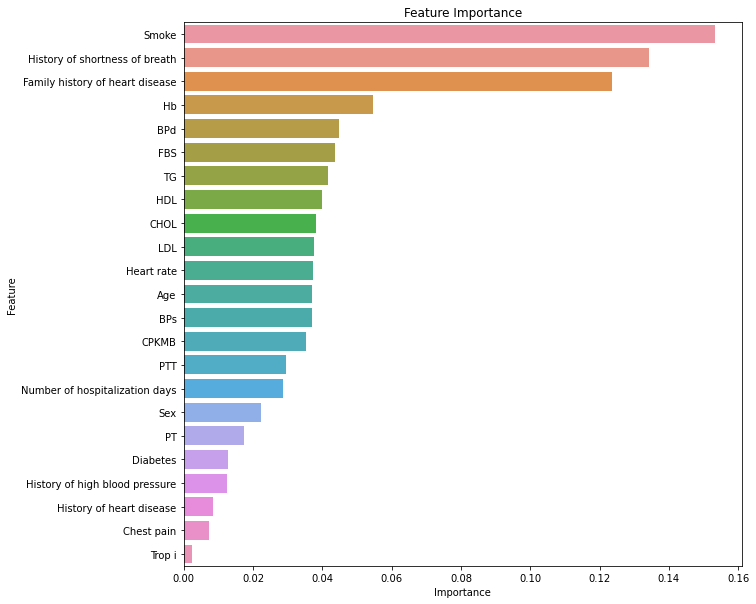

In [16]:
#Plot the feature importances
feat_imp = pd.DataFrame(list(zip(X_train.columns, importances)), columns = ["feature", "importance"])
feat_imp = feat_imp.sort_values("importance", ascending = False).iloc[:, :]

fig, ax = plt.subplots(figsize=(10, 10))
sns.barplot(y="feature", x="importance", data=feat_imp)
ax.set_title('Feature Importance')
ax.set_xlabel('Importance')
ax.set_ylabel('Feature')

plt.show()

In [ ]:
# Forward Selection
sfs3 = SFS(MLPClassifier(), 
           k_features=15, 
           forward=True, 
           floating=False, 
           verbose=1,
           scoring='roc_auc',
           cv=10)

sfs3 = sfs3.fit(np.array(X_train), y_train)

In [18]:
selected_feat3= X_train.columns[list(sfs3.k_feature_idx_)]
selected_feat3

Index(['Sex', 'FBS', 'HDL', 'Hb', 'PTT', 'Trop i', 'BPs', 'Heart rate',
       'Diabetes', 'Smoke', 'History of shortness of breath',
       'History of heart disease', 'Family history of heart disease',
       'History of high blood pressure', 'Number of hospitalization days'],
      dtype='object')

In [ ]:
# Backward Elimination
sfs4 = SFS(MLPClassifier(), 
           k_features=15, 
           forward=False, 
           floating=False, 
           verbose=1,
           scoring='roc_auc',
           cv=10)

sfs4 = sfs4.fit(np.array(X_train), y_train)

In [20]:
selected_feat4= X_train.columns[list(sfs4.k_feature_idx_)]
selected_feat4

Index(['Sex', 'FBS', 'CHOL', 'TG', 'LDL', 'PTT', 'BPs', 'BPd', 'Heart rate',
       'Diabetes', 'Smoke', 'History of shortness of breath',
       'Family history of heart disease', 'History of high blood pressure',
       'Number of hospitalization days'],
      dtype='object')

In [21]:
# Forward Selection
sfs5 = SFS(XGBClassifier(), 
           k_features=15, 
           forward=True, 
           floating=False, 
           verbose=1,
           scoring='roc_auc',
           cv=10)

sfs5 = sfs5.fit(np.array(X_train), y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: bad input shape (243, 5)

  FitFailedWarning)
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/mlxtend/feature_selection/sequential_feature_selector.py:510: RuntimeWarning: Mean of empty slice
  all_avg_scores.append(np.nanmean(cv_scores))
Features: 1/15[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:    0.2s finished
Features: 2/15[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    0.1s finished
Features: 3/15[Parallel(n_jobs=1)]: Using backend SequentialBack

In [22]:
selected_feat5= X_train.columns[list(sfs5.k_feature_idx_)]
selected_feat5

Index(['Sex', 'Age', 'FBS', 'CHOL', 'TG', 'HDL', 'LDL', 'CPKMB', 'Hb', 'PT',
       'PTT', 'Trop i', 'BPs', 'BPd', 'Heart rate'],
      dtype='object')

In [23]:
# Backward Elimination
sfs6 = SFS(XGBClassifier(), 
           k_features=15, 
           forward=False, 
           floating=False, 
           verbose=1,
           scoring='roc_auc',
           cv=10)

sfs6 = sfs6.fit(np.array(X_train), y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: bad input shape (243, 5)

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/mlxtend/feature_selection/sequential_feature_selector.py:334: RuntimeWarning: Mean of empty slice
  'avg_score': np.nanmean(k_score)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/mlxtend/feature_selection/sequential_feature_selector.py:537: RuntimeWarning: Mean of empty slice
  all_avg_scores.append(np.nanmean(cv_scores))
Features: 22/15[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:    0.2s finished
Features: 21/15[Parallel(n_jobs=1)]: Using backend Seque

In [24]:
selected_feat6= X_train.columns[list(sfs6.k_feature_idx_)]
selected_feat6

Index(['Sex', 'Age', 'FBS', 'CHOL', 'TG', 'HDL', 'LDL', 'CPKMB', 'Hb', 'PT',
       'PTT', 'Trop i', 'BPs', 'BPd', 'Heart rate'],
      dtype='object')

In [25]:
# dfover
X=dfover.drop('Target', axis=1)
y=dfover['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,
                                                    random_state=100)
X_train.shape, X_test.shape

((270, 23), (90, 23))

In [26]:
# Feature Importance
xgb = XGBClassifier()

xgb.fit(X_train, y_train)
preds = xgb.predict(X_test)
importances = xgb.feature_importances_

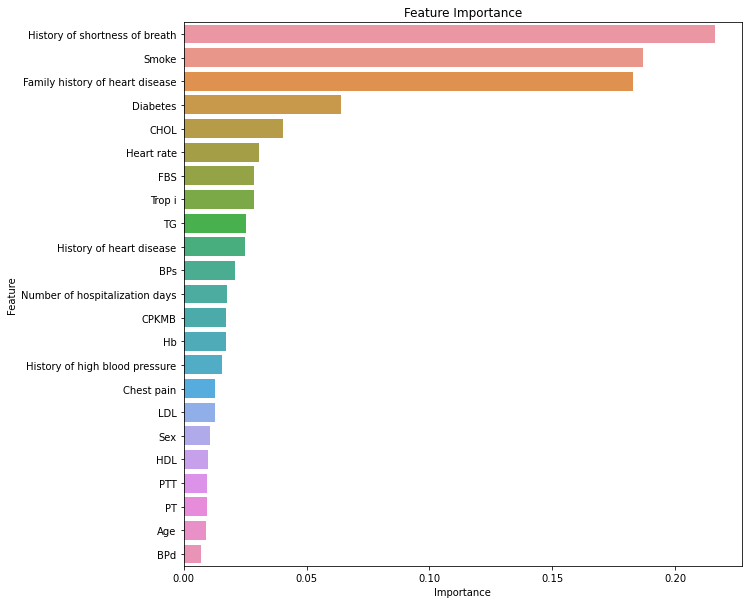

In [27]:
#Plot the feature importances
feat_imp = pd.DataFrame(list(zip(X_train.columns, importances)), columns = ["feature", "importance"])
feat_imp = feat_imp.sort_values("importance", ascending = False).iloc[:, :]

fig, ax = plt.subplots(figsize=(10, 10))
sns.barplot(y="feature", x="importance", data=feat_imp)
ax.set_title('Feature Importance')
ax.set_xlabel('Importance')
ax.set_ylabel('Feature')

plt.show()

In [28]:
# the end of GA

In [6]:
# SA

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import random
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

data = pd.read_excel('Actual Data_BalanceData_Adasyn.xlsx')
print(data.head())
X = data.iloc[:,:-1]
y = data.iloc[:,-1:].values.flatten()
chrom_length = len(data.columns)-1    # 染色体长度

#############################################
# 影响迭代次数
tmp = math.exp(3)   # 初始温度
tmp_min = math.exp(-8)    # 停止温度
alpha = 0.98    # 降温系数

counter = 100     # 生成更差解的次数

# 影响较差解采纳概率,越大越容易采纳更差解
k = 0.002
#############################################

# 是否可采纳
def is_acceptable(delta_E,tmp):     
    if delta_E<=0:   # ΔE<=0，直接采纳
        print('直接采纳')
        return True

    p=math.exp(-delta_E/(k*tmp))    # 求采纳概率
    r=random.random()
    if r<p:
        print(str(r)+"<"+str(p)+"，可采纳") 
        return True
    else:
        print(str(r)+">="+str(p)+"，不采纳"+"（"+str(counter)+"）")
        return False

# 特征编码
def geneEncoding():
    while True:
        temp = []
        has_1 = False   # 这条染色体是否有1
        for j in range(chrom_length):
            rand = random.randint(0,1)
            if rand == 1:
                has_1 = True
            temp.append(rand)
        if has_1:   # 染色体不能全0
            return temp

# 获取适应度
def getFitness(x):
    X_test = X

    has_1 = False
    for j in range(chrom_length):
        if x[j] == 0:
            X_test =X_test
        else:
            has_1 = True
    X_test = X_test.values
        
    if has_1:
        clf = RandomForestClassifier() # 决策树作为分类器
        fitness = cross_val_score(clf, X_test, y, cv=5).mean()  # 5次交叉验证
        return fitness
    else:
        fitness = 0     # 全0的适应度为0
        return fitness

# 从旧解生成新解
def getNewChrom(x):
    mpoint = random.randint(0, chrom_length-1)  # 随机选择变异点
    if x[mpoint] == 1:
        x[mpoint] = 0
    else:
        x[mpoint] = 1
    return x

# 程序入口
if __name__=='__main__':
    plt.xlabel('temperature')
    plt.ylabel('fitness')
    plt.xlim((tmp_min,tmp))    # x坐标范围
    plt.ylim((0.4,0.9)) # y坐标范围
    px = []
    py_old = []
    py_new = []
    plt.ion()
    
    x_old = geneEncoding()    # 生成初始随机解
    E_old = getFitness(x_old)

    while tmp > tmp_min:

        x_new = getNewChrom(x_old)   # 生成随机解
        E_new = getFitness(x_new)
        delta_E = -(E_new - E_old)

        if is_acceptable(delta_E,tmp):  # 可采纳
            x_old = x_new
            E_old = E_new

        if delta_E<=0:   # ΔE<=0，降温
            tmp = tmp * alpha
        else:
            counter -= 1

        if counter < 0:
            break

        print(tmp)
        print(x_old)
        print(E_old)
        print()

        px.append(tmp)  # 画图
        py_old.append(E_old)
        py_new.append(E_new)
        plt.plot(px,py_old,'r')
        plt.plot(px,py_new)
        plt.show()
        plt.pause(0.001)
    


   Sex  Age  History of shortness of breath  History of heart disease  \
0    0   58                               0                         0   
1    0   65                               0                         0   
2    0   75                               0                         1   
3    0   67                               0                         1   
4    1   74                               0                         1   

   Family history of heart disease  History of high blood pressure  \
0                                1                               0   
1                                1                               0   
2                                0                               0   
3                                1                               0   
4                                0                               0   

   Number of hospitalization days    FBS   CHOL     TG  ...    PT   PTT  \
0                               1  110.0  173.0   75.0  ...  12.0

KeyboardInterrupt: 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import random
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

data = pd.read_excel('Actual Data_BalanceData_Adasyn.xlsx)
print(data.head())
X = data.iloc[:,:-1]
y = data.iloc[:,-1:].values.flatten()
chrom_length = len(data.columns)-1    # 染色体长度

#############################################
# 影响迭代次数
tmp = math.exp(3)   # 初始温度
tmp_min = math.exp(-8)    # 停止温度
alpha = 0.98    # 降温系数

counter = 100     # 生成更差解的次数

# 影响较差解采纳概率,越大越容易采纳更差解
k = 0.002
#############################################

# 是否可采纳
def is_acceptable(delta_E,tmp):     
    if delta_E<=0:   # ΔE<=0，直接采纳
        print('直接采纳')
        return True

    p=math.exp(-delta_E/(k*tmp))    # 求采纳概率
    r=random.random()
    if r<p:
        print(str(r)+"<"+str(p)+"，可采纳") 
        return True
    else:
        print(str(r)+">="+str(p)+"，不采纳"+"（"+str(counter)+"）")
        return False

# 特征编码
def geneEncoding():
    while True:
        temp = []
        has_1 = False   # 这条染色体是否有1
        for j in range(chrom_length):
            rand = random.randint(0,1)
            if rand == 1:
                has_1 = True
            temp.append(rand)
        if has_1:   # 染色体不能全0
            return temp

# 获取适应度
def getFitness(x):
    X_test = X

    has_1 = False
    for j in range(chrom_length):
        if x[j] == 0:
            X_test =X_test
        else:
            has_1 = True
    X_test = X_test.values
        
    if has_1:
        clf = AdaBoostClassifier() # 决策树作为分类器
        fitness = cross_val_score(clf, X_test, y, cv=5).mean()  # 5次交叉验证
        return fitness
    else:
        fitness = 0     # 全0的适应度为0
        return fitness

# 从旧解生成新解
def getNewChrom(x):
    mpoint = random.randint(0, chrom_length-1)  # 随机选择变异点
    if x[mpoint] == 1:
        x[mpoint] = 0
    else:
        x[mpoint] = 1
    return x

# 程序入口
if __name__=='__main__':
    plt.xlabel('temperature')
    plt.ylabel('fitness')
    plt.xlim((tmp_min,tmp))    # x坐标范围
    plt.ylim((0.4,0.9)) # y坐标范围
    px = []
    py_old = []
    py_new = []
    plt.ion()
    
    x_old = geneEncoding()    # 生成初始随机解
    E_old = getFitness(x_old)

    while tmp > tmp_min:

        x_new = getNewChrom(x_old)   # 生成随机解
        E_new = getFitness(x_new)
        delta_E = -(E_new - E_old)

        if is_acceptable(delta_E,tmp):  # 可采纳
            x_old = x_new
            E_old = E_new

        if delta_E<=0:   # ΔE<=0，降温
            tmp = tmp * alpha
        else:
            counter -= 1

        if counter < 0:
            break

        print(tmp)
        print(x_old)
        print(E_old)
        print()

        px.append(tmp)  # 画图
        py_old.append(E_old)
        py_new.append(E_new)
        plt.plot(px,py_old,'r')
        plt.plot(px,py_new)
        plt.show()
        plt.pause(0.001)
    


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import random
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

data = pd.read_excel('Actual Data_BalanceData_Adasyn.xlsx)
print(data.head())
X = data.iloc[:,:-1]
y = data.iloc[:,-1:].values.flatten()
chrom_length = len(data.columns)-1    # 染色体长度

#############################################
# 影响迭代次数
tmp = math.exp(3)   # 初始温度
tmp_min = math.exp(-8)    # 停止温度
alpha = 0.98    # 降温系数

counter = 100     # 生成更差解的次数

# 影响较差解采纳概率,越大越容易采纳更差解
k = 0.002
#############################################

# 是否可采纳
def is_acceptable(delta_E,tmp):     
    if delta_E<=0:   # ΔE<=0，直接采纳
        print('直接采纳')
        return True

    p=math.exp(-delta_E/(k*tmp))    # 求采纳概率
    r=random.random()
    if r<p:
        print(str(r)+"<"+str(p)+"，可采纳") 
        return True
    else:
        print(str(r)+">="+str(p)+"，不采纳"+"（"+str(counter)+"）")
        return False

# 特征编码
def geneEncoding():
    while True:
        temp = []
        has_1 = False   # 这条染色体是否有1
        for j in range(chrom_length):
            rand = random.randint(0,1)
            if rand == 1:
                has_1 = True
            temp.append(rand)
        if has_1:   # 染色体不能全0
            return temp

# 获取适应度
def getFitness(x):
    X_test = X

    has_1 = False
    for j in range(chrom_length):
        if x[j] == 0:
            X_test =X_test
        else:
            has_1 = True
    X_test = X_test.values
        
    if has_1:
        clf = GradientBoostingClassifier() # 决策树作为分类器
        fitness = cross_val_score(clf, X_test, y, cv=5).mean()  # 5次交叉验证
        return fitness
    else:
        fitness = 0     # 全0的适应度为0
        return fitness

# 从旧解生成新解
def getNewChrom(x):
    mpoint = random.randint(0, chrom_length-1)  # 随机选择变异点
    if x[mpoint] == 1:
        x[mpoint] = 0
    else:
        x[mpoint] = 1
    return x

# 程序入口
if __name__=='__main__':
    plt.xlabel('temperature')
    plt.ylabel('fitness')
    plt.xlim((tmp_min,tmp))    # x坐标范围
    plt.ylim((0.4,0.9)) # y坐标范围
    px = []
    py_old = []
    py_new = []
    plt.ion()
    
    x_old = geneEncoding()    # 生成初始随机解
    E_old = getFitness(x_old)

    while tmp > tmp_min:

        x_new = getNewChrom(x_old)   # 生成随机解
        E_new = getFitness(x_new)
        delta_E = -(E_new - E_old)

        if is_acceptable(delta_E,tmp):  # 可采纳
            x_old = x_new
            E_old = E_new

        if delta_E<=0:   # ΔE<=0，降温
            tmp = tmp * alpha
        else:
            counter -= 1

        if counter < 0:
            break

        print(tmp)
        print(x_old)
        print(E_old)
        print()

        px.append(tmp)  # 画图
        py_old.append(E_old)
        py_new.append(E_new)
        plt.plot(px,py_old,'r')
        plt.plot(px,py_new)
        plt.show()
        plt.pause(0.001)
    


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import random
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

data = pd.read_excel('Actual Data_BalanceData_Adasyn.xlsx)
print(data.head())
X = data.iloc[:,:-1]
y = data.iloc[:,-1:].values.flatten()
chrom_length = len(data.columns)-1    # 染色体长度

#############################################
# 影响迭代次数
tmp = math.exp(3)   # 初始温度
tmp_min = math.exp(-8)    # 停止温度
alpha = 0.98    # 降温系数

counter = 100     # 生成更差解的次数

# 影响较差解采纳概率,越大越容易采纳更差解
k = 0.002
#############################################

# 是否可采纳
def is_acceptable(delta_E,tmp):     
    if delta_E<=0:   # ΔE<=0，直接采纳
        print('直接采纳')
        return True

    p=math.exp(-delta_E/(k*tmp))    # 求采纳概率
    r=random.random()
    if r<p:
        print(str(r)+"<"+str(p)+"，可采纳") 
        return True
    else:
        print(str(r)+">="+str(p)+"，不采纳"+"（"+str(counter)+"）")
        return False

# 特征编码
def geneEncoding():
    while True:
        temp = []
        has_1 = False   # 这条染色体是否有1
        for j in range(chrom_length):
            rand = random.randint(0,1)
            if rand == 1:
                has_1 = True
            temp.append(rand)
        if has_1:   # 染色体不能全0
            return temp

# 获取适应度
def getFitness(x):
    X_test = X

    has_1 = False
    for j in range(chrom_length):
        if x[j] == 0:
            X_test =X_test
        else:
            has_1 = True
    X_test = X_test.values
        
    if has_1:
        clf = MLPClassifier() # 决策树作为分类器
        fitness = cross_val_score(clf, X_test, y, cv=5).mean()  # 5次交叉验证
        return fitness
    else:
        fitness = 0     # 全0的适应度为0
        return fitness

# 从旧解生成新解
def getNewChrom(x):
    mpoint = random.randint(0, chrom_length-1)  # 随机选择变异点
    if x[mpoint] == 1:
        x[mpoint] = 0
    else:
        x[mpoint] = 1
    return x

# 程序入口
if __name__=='__main__':
    plt.xlabel('temperature')
    plt.ylabel('fitness')
    plt.xlim((tmp_min,tmp))    # x坐标范围
    plt.ylim((0.4,0.9)) # y坐标范围
    px = []
    py_old = []
    py_new = []
    plt.ion()
    
    x_old = geneEncoding()    # 生成初始随机解
    E_old = getFitness(x_old)

    while tmp > tmp_min:

        x_new = getNewChrom(x_old)   # 生成随机解
        E_new = getFitness(x_new)
        delta_E = -(E_new - E_old)

        if is_acceptable(delta_E,tmp):  # 可采纳
            x_old = x_new
            E_old = E_new

        if delta_E<=0:   # ΔE<=0，降温
            tmp = tmp * alpha
        else:
            counter -= 1

        if counter < 0:
            break

        print(tmp)
        print(x_old)
        print(E_old)
        print()

        px.append(tmp)  # 画图
        py_old.append(E_old)
        py_new.append(E_new)
        plt.plot(px,py_old,'r')
        plt.plot(px,py_new)
        plt.show()
        plt.pause(0.001)
    


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import random
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

data = pd.read_excel('Actual Data_BalanceData_Adasyn.xlsx)
print(data.head())
X = data.iloc[:,:-1]
y = data.iloc[:,-1:].values.flatten()
chrom_length = len(data.columns)-1    # 染色体长度

#############################################
# 影响迭代次数
tmp = math.exp(3)   # 初始温度
tmp_min = math.exp(-8)    # 停止温度
alpha = 0.98    # 降温系数

counter = 100     # 生成更差解的次数

# 影响较差解采纳概率,越大越容易采纳更差解
k = 0.002
#############################################

# 是否可采纳
def is_acceptable(delta_E,tmp):     
    if delta_E<=0:   # ΔE<=0，直接采纳
        print('直接采纳')
        return True

    p=math.exp(-delta_E/(k*tmp))    # 求采纳概率
    r=random.random()
    if r<p:
        print(str(r)+"<"+str(p)+"，可采纳") 
        return True
    else:
        print(str(r)+">="+str(p)+"，不采纳"+"（"+str(counter)+"）")
        return False

# 特征编码
def geneEncoding():
    while True:
        temp = []
        has_1 = False   # 这条染色体是否有1
        for j in range(chrom_length):
            rand = random.randint(0,1)
            if rand == 1:
                has_1 = True
            temp.append(rand)
        if has_1:   # 染色体不能全0
            return temp

# 获取适应度
def getFitness(x):
    X_test = X

    has_1 = False
    for j in range(chrom_length):
        if x[j] == 0:
            X_test =X_test
        else:
            has_1 = True
    X_test = X_test.values
        
    if has_1:
        clf = XGBClassifier() # 决策树作为分类器
        fitness = cross_val_score(clf, X_test, y, cv=5).mean()  # 5次交叉验证
        return fitness
    else:
        fitness = 0     # 全0的适应度为0
        return fitness

# 从旧解生成新解
def getNewChrom(x):
    mpoint = random.randint(0, chrom_length-1)  # 随机选择变异点
    if x[mpoint] == 1:
        x[mpoint] = 0
    else:
        x[mpoint] = 1
    return x

# 程序入口
if __name__=='__main__':
    plt.xlabel('temperature')
    plt.ylabel('fitness')
    plt.xlim((tmp_min,tmp))    # x坐标范围
    plt.ylim((0.4,0.9)) # y坐标范围
    px = []
    py_old = []
    py_new = []
    plt.ion()
    
    x_old = geneEncoding()    # 生成初始随机解
    E_old = getFitness(x_old)

    while tmp > tmp_min:

        x_new = getNewChrom(x_old)   # 生成随机解
        E_new = getFitness(x_new)
        delta_E = -(E_new - E_old)

        if is_acceptable(delta_E,tmp):  # 可采纳
            x_old = x_new
            E_old = E_new

        if delta_E<=0:   # ΔE<=0，降温
            tmp = tmp * alpha
        else:
            counter -= 1

        if counter < 0:
            break

        print(tmp)
        print(x_old)
        print(E_old)
        print()

        px.append(tmp)  # 画图
        py_old.append(E_old)
        py_new.append(E_new)
        plt.plot(px,py_old,'r')
        plt.plot(px,py_new)
        plt.show()
        plt.pause(0.001)
    


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import random
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

data = pd.read_excel('Actual Data_BalanceData_SMOTE.xlsx')
print(data.head())
X = data.iloc[:,:-1]
y = data.iloc[:,-1:].values.flatten()
chrom_length = len(data.columns)-1    # 染色体长度

#############################################
# 影响迭代次数
tmp = math.exp(3)   # 初始温度
tmp_min = math.exp(-8)    # 停止温度
alpha = 0.98    # 降温系数

counter = 100     # 生成更差解的次数

# 影响较差解采纳概率,越大越容易采纳更差解
k = 0.002
#############################################

# 是否可采纳
def is_acceptable(delta_E,tmp):     
    if delta_E<=0:   # ΔE<=0，直接采纳
        print('直接采纳')
        return True

    p=math.exp(-delta_E/(k*tmp))    # 求采纳概率
    r=random.random()
    if r<p:
        print(str(r)+"<"+str(p)+"，可采纳") 
        return True
    else:
        print(str(r)+">="+str(p)+"，不采纳"+"（"+str(counter)+"）")
        return False

# 特征编码
def geneEncoding():
    while True:
        temp = []
        has_1 = False   # 这条染色体是否有1
        for j in range(chrom_length):
            rand = random.randint(0,1)
            if rand == 1:
                has_1 = True
            temp.append(rand)
        if has_1:   # 染色体不能全0
            return temp

# 获取适应度
def getFitness(x):
    X_test = X

    has_1 = False
    for j in range(chrom_length):
        if x[j] == 0:
            X_test =X_test
        else:
            has_1 = True
    X_test = X_test.values
        
    if has_1:
        clf = RandomForestClassifier() # 决策树作为分类器
        fitness = cross_val_score(clf, X_test, y, cv=5).mean()  # 5次交叉验证
        return fitness
    else:
        fitness = 0     # 全0的适应度为0
        return fitness

# 从旧解生成新解
def getNewChrom(x):
    mpoint = random.randint(0, chrom_length-1)  # 随机选择变异点
    if x[mpoint] == 1:
        x[mpoint] = 0
    else:
        x[mpoint] = 1
    return x

# 程序入口
if __name__=='__main__':
    plt.xlabel('temperature')
    plt.ylabel('fitness')
    plt.xlim((tmp_min,tmp))    # x坐标范围
    plt.ylim((0.4,0.9)) # y坐标范围
    px = []
    py_old = []
    py_new = []
    plt.ion()
    
    x_old = geneEncoding()    # 生成初始随机解
    E_old = getFitness(x_old)

    while tmp > tmp_min:

        x_new = getNewChrom(x_old)   # 生成随机解
        E_new = getFitness(x_new)
        delta_E = -(E_new - E_old)

        if is_acceptable(delta_E,tmp):  # 可采纳
            x_old = x_new
            E_old = E_new

        if delta_E<=0:   # ΔE<=0，降温
            tmp = tmp * alpha
        else:
            counter -= 1

        if counter < 0:
            break

        print(tmp)
        print(x_old)
        print(E_old)
        print()

        px.append(tmp)  # 画图
        py_old.append(E_old)
        py_new.append(E_new)
        plt.plot(px,py_old,'r')
        plt.plot(px,py_new)
        plt.show()
        plt.pause(0.001)


SyntaxError: invalid syntax (1665352572.py, line 133)

In [183]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import random
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

data = pd.read_excel('Actual Data_BalanceData_SMOTE.xlsx)
print(data.head())
X = data.iloc[:,:-1]
y = data.iloc[:,-1:].values.flatten()
chrom_length = len(data.columns)-1    # 染色体长度

#############################################
# 影响迭代次数
tmp = math.exp(3)   # 初始温度
tmp_min = math.exp(-8)    # 停止温度
alpha = 0.98    # 降温系数

counter = 100     # 生成更差解的次数

# 影响较差解采纳概率,越大越容易采纳更差解
k = 0.002
#############################################

# 是否可采纳
def is_acceptable(delta_E,tmp):     
    if delta_E<=0:   # ΔE<=0，直接采纳
        print('直接采纳')
        return True

    p=math.exp(-delta_E/(k*tmp))    # 求采纳概率
    r=random.random()
    if r<p:
        print(str(r)+"<"+str(p)+"，可采纳") 
        return True
    else:
        print(str(r)+">="+str(p)+"，不采纳"+"（"+str(counter)+"）")
        return False

# 特征编码
def geneEncoding():
    while True:
        temp = []
        has_1 = False   # 这条染色体是否有1
        for j in range(chrom_length):
            rand = random.randint(0,1)
            if rand == 1:
                has_1 = True
            temp.append(rand)
        if has_1:   # 染色体不能全0
            return temp

# 获取适应度
def getFitness(x):
    X_test = X

    has_1 = False
    for j in range(chrom_length):
        if x[j] == 0:
            X_test =X_test
        else:
            has_1 = True
    X_test = X_test.values
        
    if has_1:
        clf = AdaBoostClassifier() # 决策树作为分类器
        fitness = cross_val_score(clf, X_test, y, cv=5).mean()  # 5次交叉验证
        return fitness
    else:
        fitness = 0     # 全0的适应度为0
        return fitness

# 从旧解生成新解
def getNewChrom(x):
    mpoint = random.randint(0, chrom_length-1)  # 随机选择变异点
    if x[mpoint] == 1:
        x[mpoint] = 0
    else:
        x[mpoint] = 1
    return x

# 程序入口
if __name__=='__main__':
    plt.xlabel('temperature')
    plt.ylabel('fitness')
    plt.xlim((tmp_min,tmp))    # x坐标范围
    plt.ylim((0.4,0.9)) # y坐标范围
    px = []
    py_old = []
    py_new = []
    plt.ion()
    
    x_old = geneEncoding()    # 生成初始随机解
    E_old = getFitness(x_old)

    while tmp > tmp_min:

        x_new = getNewChrom(x_old)   # 生成随机解
        E_new = getFitness(x_new)
        delta_E = -(E_new - E_old)

        if is_acceptable(delta_E,tmp):  # 可采纳
            x_old = x_new
            E_old = E_new

        if delta_E<=0:   # ΔE<=0，降温
            tmp = tmp * alpha
        else:
            counter -= 1

        if counter < 0:
            break

        print(tmp)
        print(x_old)
        print(E_old)
        print()

        px.append(tmp)  # 画图
        py_old.append(E_old)
        py_new.append(E_new)
        plt.plot(px,py_old,'r')
        plt.plot(px,py_new)
        plt.show()
        plt.pause(0.001)
    


SyntaxError: invalid syntax (1193592206.py, line 13)

In [184]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import random
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

data = pd.read_excel('Actual Data_BalanceData_SMOTE.xlsx)
print(data.head())
X = data.iloc[:,:-1]
y = data.iloc[:,-1:].values.flatten()
chrom_length = len(data.columns)-1    # 染色体长度

#############################################
# 影响迭代次数
tmp = math.exp(3)   # 初始温度
tmp_min = math.exp(-8)    # 停止温度
alpha = 0.98    # 降温系数

counter = 100     # 生成更差解的次数

# 影响较差解采纳概率,越大越容易采纳更差解
k = 0.002
#############################################

# 是否可采纳
def is_acceptable(delta_E,tmp):     
    if delta_E<=0:   # ΔE<=0，直接采纳
        print('直接采纳')
        return True

    p=math.exp(-delta_E/(k*tmp))    # 求采纳概率
    r=random.random()
    if r<p:
        print(str(r)+"<"+str(p)+"，可采纳") 
        return True
    else:
        print(str(r)+">="+str(p)+"，不采纳"+"（"+str(counter)+"）")
        return False

# 特征编码
def geneEncoding():
    while True:
        temp = []
        has_1 = False   # 这条染色体是否有1
        for j in range(chrom_length):
            rand = random.randint(0,1)
            if rand == 1:
                has_1 = True
            temp.append(rand)
        if has_1:   # 染色体不能全0
            return temp

# 获取适应度
def getFitness(x):
    X_test = X

    has_1 = False
    for j in range(chrom_length):
        if x[j] == 0:
            X_test =X_test
        else:
            has_1 = True
    X_test = X_test.values
        
    if has_1:
        clf = GradientBoostingClassifier() # 决策树作为分类器
        fitness = cross_val_score(clf, X_test, y, cv=5).mean()  # 5次交叉验证
        return fitness
    else:
        fitness = 0     # 全0的适应度为0
        return fitness

# 从旧解生成新解
def getNewChrom(x):
    mpoint = random.randint(0, chrom_length-1)  # 随机选择变异点
    if x[mpoint] == 1:
        x[mpoint] = 0
    else:
        x[mpoint] = 1
    return x

# 程序入口
if __name__=='__main__':
    plt.xlabel('temperature')
    plt.ylabel('fitness')
    plt.xlim((tmp_min,tmp))    # x坐标范围
    plt.ylim((0.4,0.9)) # y坐标范围
    px = []
    py_old = []
    py_new = []
    plt.ion()
    
    x_old = geneEncoding()    # 生成初始随机解
    E_old = getFitness(x_old)

    while tmp > tmp_min:

        x_new = getNewChrom(x_old)   # 生成随机解
        E_new = getFitness(x_new)
        delta_E = -(E_new - E_old)

        if is_acceptable(delta_E,tmp):  # 可采纳
            x_old = x_new
            E_old = E_new

        if delta_E<=0:   # ΔE<=0，降温
            tmp = tmp * alpha
        else:
            counter -= 1

        if counter < 0:
            break

        print(tmp)
        print(x_old)
        print(E_old)
        print()

        px.append(tmp)  # 画图
        py_old.append(E_old)
        py_new.append(E_new)
        plt.plot(px,py_old,'r')
        plt.plot(px,py_new)
        plt.show()
        plt.pause(0.001)
    


SyntaxError: invalid syntax (2904330760.py, line 12)

In [185]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import random
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

data = pd.read_excel('Actual Data_BalanceData_SMOTE.xlsx')
print(data.head())
X = data.iloc[:,:-1]
y = data.iloc[:,-1:].values.flatten()
chrom_length = len(data.columns)-1    # 染色体长度

#############################################
# 影响迭代次数
tmp = math.exp(3)   # 初始温度
tmp_min = math.exp(-8)    # 停止温度
alpha = 0.98    # 降温系数

counter = 100     # 生成更差解的次数

# 影响较差解采纳概率,越大越容易采纳更差解
k = 0.002
#############################################

# 是否可采纳
def is_acceptable(delta_E,tmp):     
    if delta_E<=0:   # ΔE<=0，直接采纳
        print('直接采纳')
        return True

    p=math.exp(-delta_E/(k*tmp))    # 求采纳概率
    r=random.random()
    if r<p:
        print(str(r)+"<"+str(p)+"，可采纳") 
        return True
    else:
        print(str(r)+">="+str(p)+"，不采纳"+"（"+str(counter)+"）")
        return False

# 特征编码
def geneEncoding():
    while True:
        temp = []
        has_1 = False   # 这条染色体是否有1
        for j in range(chrom_length):
            rand = random.randint(0,1)
            if rand == 1:
                has_1 = True
            temp.append(rand)
        if has_1:   # 染色体不能全0
            return temp

# 获取适应度
def getFitness(x):
    X_test = X

    has_1 = False
    for j in range(chrom_length):
        if x[j] == 0:
            X_test =X_test
        else:
            has_1 = True
    X_test = X_test.values
        
    if has_1:
        clf = XGBClassifier() # 决策树作为分类器
        fitness = cross_val_score(clf, X_test, y, cv=5).mean()  # 5次交叉验证
        return fitness
    else:
        fitness = 0     # 全0的适应度为0
        return fitness

# 从旧解生成新解
def getNewChrom(x):
    mpoint = random.randint(0, chrom_length-1)  # 随机选择变异点
    if x[mpoint] == 1:
        x[mpoint] = 0
    else:
        x[mpoint] = 1
    return x

# 程序入口
if __name__=='__main__':
    plt.xlabel('temperature')
    plt.ylabel('fitness')
    plt.xlim((tmp_min,tmp))    # x坐标范围
    plt.ylim((0.4,0.9)) # y坐标范围
    px = []
    py_old = []
    py_new = []
    plt.ion()
    
    x_old = geneEncoding()    # 生成初始随机解
    E_old = getFitness(x_old)

    while tmp > tmp_min:

        x_new = getNewChrom(x_old)   # 生成随机解
        E_new = getFitness(x_new)
        delta_E = -(E_new - E_old)

        if is_acceptable(delta_E,tmp):  # 可采纳
            x_old = x_new
            E_old = E_new

        if delta_E<=0:   # ΔE<=0，降温
            tmp = tmp * alpha
        else:
            counter -= 1

        if counter < 0:
            break

        print(tmp)
        print(x_old)
        print(E_old)
        print()

        px.append(tmp)  # 画图
        py_old.append(E_old)
        py_new.append(E_new)
        plt.plot(px,py_old,'r')
        plt.plot(px,py_new)
        plt.show()
        plt.pause(0.001)
    


SyntaxError: invalid syntax (1758226845.py, line 12)

In [186]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import random
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

data = pd.read_excel('Actual Data_BalanceData_SMOTE.xlsx)
print(data.head())
X = data.iloc[:,:-1]
y = data.iloc[:,-1:].values.flatten()
chrom_length = len(data.columns)-1    # 染色体长度

#############################################
# 影响迭代次数
tmp = math.exp(3)   # 初始温度
tmp_min = math.exp(-8)    # 停止温度
alpha = 0.98    # 降温系数

counter = 100     # 生成更差解的次数

# 影响较差解采纳概率,越大越容易采纳更差解
k = 0.002
#############################################

# 是否可采纳
def is_acceptable(delta_E,tmp):     
    if delta_E<=0:   # ΔE<=0，直接采纳
        print('直接采纳')
        return True

    p=math.exp(-delta_E/(k*tmp))    # 求采纳概率
    r=random.random()
    if r<p:
        print(str(r)+"<"+str(p)+"，可采纳") 
        return True
    else:
        print(str(r)+">="+str(p)+"，不采纳"+"（"+str(counter)+"）")
        return False

# 特征编码
def geneEncoding():
    while True:
        temp = []
        has_1 = False   # 这条染色体是否有1
        for j in range(chrom_length):
            rand = random.randint(0,1)
            if rand == 1:
                has_1 = True
            temp.append(rand)
        if has_1:   # 染色体不能全0
            return temp

# 获取适应度
def getFitness(x):
    X_test = X

    has_1 = False
    for j in range(chrom_length):
        if x[j] == 0:
            X_test =X_test
        else:
            has_1 = True
    X_test = X_test.values
        
    if has_1:
        clf = MLPClassifier() # 决策树作为分类器
        fitness = cross_val_score(clf, X_test, y, cv=5).mean()  # 5次交叉验证
        return fitness
    else:
        fitness = 0     # 全0的适应度为0
        return fitness

# 从旧解生成新解
def getNewChrom(x):
    mpoint = random.randint(0, chrom_length-1)  # 随机选择变异点
    if x[mpoint] == 1:
        x[mpoint] = 0
    else:
        x[mpoint] = 1
    return x

# 程序入口
if __name__=='__main__':
    plt.xlabel('temperature')
    plt.ylabel('fitness')
    plt.xlim((tmp_min,tmp))    # x坐标范围
    plt.ylim((0.4,0.9)) # y坐标范围
    px = []
    py_old = []
    py_new = []
    plt.ion()
    
    x_old = geneEncoding()    # 生成初始随机解
    E_old = getFitness(x_old)

    while tmp > tmp_min:

        x_new = getNewChrom(x_old)   # 生成随机解
        E_new = getFitness(x_new)
        delta_E = -(E_new - E_old)

        if is_acceptable(delta_E,tmp):  # 可采纳
            x_old = x_new
            E_old = E_new

        if delta_E<=0:   # ΔE<=0，降温
            tmp = tmp * alpha
        else:
            counter -= 1

        if counter < 0:
            break

        print(tmp)
        print(x_old)
        print(E_old)
        print()

        px.append(tmp)  # 画图
        py_old.append(E_old)
        py_new.append(E_new)
        plt.plot(px,py_old,'r')
        plt.plot(px,py_new)
        plt.show()
        plt.pause(0.001)
    


SyntaxError: invalid syntax (1684782184.py, line 12)

In [187]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import random
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

data = pd.read_excel('Actual Data_BalanceData_SMOTE.xlsx')
print(data.head())
X = data.iloc[:,:-1]
y = data.iloc[:,-1:].values.flatten()
chrom_length = len(data.columns)-1    # 染色体长度

#############################################
# 影响迭代次数
tmp = math.exp(3)   # 初始温度
tmp_min = math.exp(-8)    # 停止温度
alpha = 0.98    # 降温系数

counter = 100     # 生成更差解的次数

# 影响较差解采纳概率,越大越容易采纳更差解
k = 0.002
#############################################

# 是否可采纳
def is_acceptable(delta_E,tmp):     
    if delta_E<=0:   # ΔE<=0，直接采纳
        print('直接采纳')
        return True

    p=math.exp(-delta_E/(k*tmp))    # 求采纳概率
    r=random.random()
    if r<p:
        print(str(r)+"<"+str(p)+"，可采纳") 
        return True
    else:
        print(str(r)+">="+str(p)+"，不采纳"+"（"+str(counter)+"）")
        return False

# 特征编码
def geneEncoding():
    while True:
        temp = []
        has_1 = False   # 这条染色体是否有1
        for j in range(chrom_length):
            rand = random.randint(0,1)
            if rand == 1:
                has_1 = True
            temp.append(rand)
        if has_1:   # 染色体不能全0
            return temp

# 获取适应度
def getFitness(x):
    X_test = X

    has_1 = False
    for j in range(chrom_length):
        if x[j] == 0:
            X_test =X_test
        else:
            has_1 = True
    X_test = X_test.values
        
    if has_1:
        clf = RandomForestClassifier() # 决策树作为分类器
        fitness = cross_val_score(clf, X_test, y, cv=5).mean()  # 5次交叉验证
        return fitness
    else:
        fitness = 0     # 全0的适应度为0
        return fitness

# 从旧解生成新解
def getNewChrom(x):
    mpoint = random.randint(0, chrom_length-1)  # 随机选择变异点
    if x[mpoint] == 1:
        x[mpoint] = 0
    else:
        x[mpoint] = 1
    return x

# 程序入口
if __name__=='__main__':
    plt.xlabel('temperature')
    plt.ylabel('fitness')
    plt.xlim((tmp_min,tmp))    # x坐标范围
    plt.ylim((0.4,0.9)) # y坐标范围
    px = []
    py_old = []
    py_new = []
    plt.ion()
    
    x_old = geneEncoding()    # 生成初始随机解
    E_old = getFitness(x_old)

    while tmp > tmp_min:

        x_new = getNewChrom(x_old)   # 生成随机解
        E_new = getFitness(x_new)
        delta_E = -(E_new - E_old)

        if is_acceptable(delta_E,tmp):  # 可采纳
            x_old = x_new
            E_old = E_new

        if delta_E<=0:   # ΔE<=0，降温
            tmp = tmp * alpha
        else:
            counter -= 1

        if counter < 0:
            break

        print(tmp)
        print(x_old)
        print(E_old)
        print()

        px.append(tmp)  # 画图
        py_old.append(E_old)
        py_new.append(E_new)
        plt.plot(px,py_old,'r')
        plt.plot(px,py_new)
        plt.show()
        plt.pause(0.001)
    


SyntaxError: invalid syntax (704820559.py, line 12)

In [188]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import random
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

data = pd.read_excel('Actual Data_BalanceData_oversampling.xlsx')
print(data.head())
X = data.iloc[:,:-1]
y = data.iloc[:,-1:].values.flatten()
chrom_length = len(data.columns)-1    # 染色体长度

#############################################
# 影响迭代次数
tmp = math.exp(3)   # 初始温度
tmp_min = math.exp(-8)    # 停止温度
alpha = 0.98    # 降温系数

counter = 100     # 生成更差解的次数

# 影响较差解采纳概率,越大越容易采纳更差解
k = 0.002
#############################################

# 是否可采纳
def is_acceptable(delta_E,tmp):     
    if delta_E<=0:   # ΔE<=0，直接采纳
        print('直接采纳')
        return True

    p=math.exp(-delta_E/(k*tmp))    # 求采纳概率
    r=random.random()
    if r<p:
        print(str(r)+"<"+str(p)+"，可采纳") 
        return True
    else:
        print(str(r)+">="+str(p)+"，不采纳"+"（"+str(counter)+"）")
        return False

# 特征编码
def geneEncoding():
    while True:
        temp = []
        has_1 = False   # 这条染色体是否有1
        for j in range(chrom_length):
            rand = random.randint(0,1)
            if rand == 1:
                has_1 = True
            temp.append(rand)
        if has_1:   # 染色体不能全0
            return temp

# 获取适应度
def getFitness(x):
    X_test = X

    has_1 = False
    for j in range(chrom_length):
        if x[j] == 0:
            X_test =X_test
        else:
            has_1 = True
    X_test = X_test.values
        
    if has_1:
        clf = AdaBoostClassifier() # 决策树作为分类器
        fitness = cross_val_score(clf, X_test, y, cv=5).mean()  # 5次交叉验证
        return fitness
    else:
        fitness = 0     # 全0的适应度为0
        return fitness

# 从旧解生成新解
def getNewChrom(x):
    mpoint = random.randint(0, chrom_length-1)  # 随机选择变异点
    if x[mpoint] == 1:
        x[mpoint] = 0
    else:
        x[mpoint] = 1
    return x

# 程序入口
if __name__=='__main__':
    plt.xlabel('temperature')
    plt.ylabel('fitness')
    plt.xlim((tmp_min,tmp))    # x坐标范围
    plt.ylim((0.4,0.9)) # y坐标范围
    px = []
    py_old = []
    py_new = []
    plt.ion()
    
    x_old = geneEncoding()    # 生成初始随机解
    E_old = getFitness(x_old)

    while tmp > tmp_min:

        x_new = getNewChrom(x_old)   # 生成随机解
        E_new = getFitness(x_new)
        delta_E = -(E_new - E_old)

        if is_acceptable(delta_E,tmp):  # 可采纳
            x_old = x_new
            E_old = E_new

        if delta_E<=0:   # ΔE<=0，降温
            tmp = tmp * alpha
        else:
            counter -= 1

        if counter < 0:
            break

        print(tmp)
        print(x_old)
        print(E_old)
        print()

        px.append(tmp)  # 画图
        py_old.append(E_old)
        py_new.append(E_new)
        plt.plot(px,py_old,'r')
        plt.plot(px,py_new)
        plt.show()
        plt.pause(0.001)
    


SyntaxError: invalid syntax (96251225.py, line 12)

In [189]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import random
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

data = pd.read_excel('Actual Data_BalanceData_oversampling.xlsx')
print(data.head())
X = data.iloc[:,:-1]
y = data.iloc[:,-1:].values.flatten()
chrom_length = len(data.columns)-1    # 染色体长度

#############################################
# 影响迭代次数
tmp = math.exp(3)   # 初始温度
tmp_min = math.exp(-8)    # 停止温度
alpha = 0.98    # 降温系数

counter = 100     # 生成更差解的次数

# 影响较差解采纳概率,越大越容易采纳更差解
k = 0.002
#############################################

# 是否可采纳
def is_acceptable(delta_E,tmp):     
    if delta_E<=0:   # ΔE<=0，直接采纳
        print('直接采纳')
        return True

    p=math.exp(-delta_E/(k*tmp))    # 求采纳概率
    r=random.random()
    if r<p:
        print(str(r)+"<"+str(p)+"，可采纳") 
        return True
    else:
        print(str(r)+">="+str(p)+"，不采纳"+"（"+str(counter)+"）")
        return False

# 特征编码
def geneEncoding():
    while True:
        temp = []
        has_1 = False   # 这条染色体是否有1
        for j in range(chrom_length):
            rand = random.randint(0,1)
            if rand == 1:
                has_1 = True
            temp.append(rand)
        if has_1:   # 染色体不能全0
            return temp

# 获取适应度
def getFitness(x):
    X_test = X

    has_1 = False
    for j in range(chrom_length):
        if x[j] == 0:
            X_test =X_test
        else:
            has_1 = True
    X_test = X_test.values
        
    if has_1:
        clf = GradientBoostingClassifier() # 决策树作为分类器
        fitness = cross_val_score(clf, X_test, y, cv=5).mean()  # 5次交叉验证
        return fitness
    else:
        fitness = 0     # 全0的适应度为0
        return fitness

# 从旧解生成新解
def getNewChrom(x):
    mpoint = random.randint(0, chrom_length-1)  # 随机选择变异点
    if x[mpoint] == 1:
        x[mpoint] = 0
    else:
        x[mpoint] = 1
    return x

# 程序入口
if __name__=='__main__':
    plt.xlabel('temperature')
    plt.ylabel('fitness')
    plt.xlim((tmp_min,tmp))    # x坐标范围
    plt.ylim((0.4,0.9)) # y坐标范围
    px = []
    py_old = []
    py_new = []
    plt.ion()
    
    x_old = geneEncoding()    # 生成初始随机解
    E_old = getFitness(x_old)

    while tmp > tmp_min:

        x_new = getNewChrom(x_old)   # 生成随机解
        E_new = getFitness(x_new)
        delta_E = -(E_new - E_old)

        if is_acceptable(delta_E,tmp):  # 可采纳
            x_old = x_new
            E_old = E_new

        if delta_E<=0:   # ΔE<=0，降温
            tmp = tmp * alpha
        else:
            counter -= 1

        if counter < 0:
            break

        print(tmp)
        print(x_old)
        print(E_old)
        print()

        px.append(tmp)  # 画图
        py_old.append(E_old)
        py_new.append(E_new)
        plt.plot(px,py_old,'r')
        plt.plot(px,py_new)
        plt.show()
        plt.pause(0.001)
    


SyntaxError: invalid syntax (2589223925.py, line 12)

In [190]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import random
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

data = pd.read_excel('Actual Data_BalanceData_oversampling.xlsx')
print(data.head())
X = data.iloc[:,:-1]
y = data.iloc[:,-1:].values.flatten()
chrom_length = len(data.columns)-1    # 染色体长度

#############################################
# 影响迭代次数
tmp = math.exp(3)   # 初始温度
tmp_min = math.exp(-8)    # 停止温度
alpha = 0.98    # 降温系数

counter = 100     # 生成更差解的次数

# 影响较差解采纳概率,越大越容易采纳更差解
k = 0.002
#############################################

# 是否可采纳
def is_acceptable(delta_E,tmp):     
    if delta_E<=0:   # ΔE<=0，直接采纳
        print('直接采纳')
        return True

    p=math.exp(-delta_E/(k*tmp))    # 求采纳概率
    r=random.random()
    if r<p:
        print(str(r)+"<"+str(p)+"，可采纳") 
        return True
    else:
        print(str(r)+">="+str(p)+"，不采纳"+"（"+str(counter)+"）")
        return False

# 特征编码
def geneEncoding():
    while True:
        temp = []
        has_1 = False   # 这条染色体是否有1
        for j in range(chrom_length):
            rand = random.randint(0,1)
            if rand == 1:
                has_1 = True
            temp.append(rand)
        if has_1:   # 染色体不能全0
            return temp

# 获取适应度
def getFitness(x):
    X_test = X

    has_1 = False
    for j in range(chrom_length):
        if x[j] == 0:
            X_test =X_test
        else:
            has_1 = True
    X_test = X_test.values
        
    if has_1:
        clf = XGBClassifier() # 决策树作为分类器
        fitness = cross_val_score(clf, X_test, y, cv=5).mean()  # 5次交叉验证
        return fitness
    else:
        fitness = 0     # 全0的适应度为0
        return fitness

# 从旧解生成新解
def getNewChrom(x):
    mpoint = random.randint(0, chrom_length-1)  # 随机选择变异点
    if x[mpoint] == 1:
        x[mpoint] = 0
    else:
        x[mpoint] = 1
    return x

# 程序入口
if __name__=='__main__':
    plt.xlabel('temperature')
    plt.ylabel('fitness')
    plt.xlim((tmp_min,tmp))    # x坐标范围
    plt.ylim((0.4,0.9)) # y坐标范围
    px = []
    py_old = []
    py_new = []
    plt.ion()
    
    x_old = geneEncoding()    # 生成初始随机解
    E_old = getFitness(x_old)

    while tmp > tmp_min:

        x_new = getNewChrom(x_old)   # 生成随机解
        E_new = getFitness(x_new)
        delta_E = -(E_new - E_old)

        if is_acceptable(delta_E,tmp):  # 可采纳
            x_old = x_new
            E_old = E_new

        if delta_E<=0:   # ΔE<=0，降温
            tmp = tmp * alpha
        else:
            counter -= 1

        if counter < 0:
            break

        print(tmp)
        print(x_old)
        print(E_old)
        print()

        px.append(tmp)  # 画图
        py_old.append(E_old)
        py_new.append(E_new)
        plt.plot(px,py_old,'r')
        plt.plot(px,py_new)
        plt.show()
        plt.pause(0.001)
    


SyntaxError: invalid syntax (1332467045.py, line 12)

In [191]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import random
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

data = pd.read_excel('Actual Data_BalanceData_oversampling.xlsx')
print(data.head())
X = data.iloc[:,:-1]
y = data.iloc[:,-1:].values.flatten()
chrom_length = len(data.columns)-1    # 染色体长度

#############################################
# 影响迭代次数
tmp = math.exp(3)   # 初始温度
tmp_min = math.exp(-8)    # 停止温度
alpha = 0.98    # 降温系数

counter = 100     # 生成更差解的次数

# 影响较差解采纳概率,越大越容易采纳更差解
k = 0.002
#############################################

# 是否可采纳
def is_acceptable(delta_E,tmp):     
    if delta_E<=0:   # ΔE<=0，直接采纳
        print('直接采纳')
        return True

    p=math.exp(-delta_E/(k*tmp))    # 求采纳概率
    r=random.random()
    if r<p:
        print(str(r)+"<"+str(p)+"，可采纳") 
        return True
    else:
        print(str(r)+">="+str(p)+"，不采纳"+"（"+str(counter)+"）")
        return False

# 特征编码
def geneEncoding():
    while True:
        temp = []
        has_1 = False   # 这条染色体是否有1
        for j in range(chrom_length):
            rand = random.randint(0,1)
            if rand == 1:
                has_1 = True
            temp.append(rand)
        if has_1:   # 染色体不能全0
            return temp

# 获取适应度
def getFitness(x):
    X_test = X

    has_1 = False
    for j in range(chrom_length):
        if x[j] == 0:
            X_test =X_test
        else:
            has_1 = True
    X_test = X_test.values
        
    if has_1:
        clf = MLPClassifier() # 决策树作为分类器
        fitness = cross_val_score(clf, X_test, y, cv=5).mean()  # 5次交叉验证
        return fitness
    else:
        fitness = 0     # 全0的适应度为0
        return fitness

# 从旧解生成新解
def getNewChrom(x):
    mpoint = random.randint(0, chrom_length-1)  # 随机选择变异点
    if x[mpoint] == 1:
        x[mpoint] = 0
    else:
        x[mpoint] = 1
    return x

# 程序入口
if __name__=='__main__':
    plt.xlabel('temperature')
    plt.ylabel('fitness')
    plt.xlim((tmp_min,tmp))    # x坐标范围
    plt.ylim((0.4,0.9)) # y坐标范围
    px = []
    py_old = []
    py_new = []
    plt.ion()
    
    x_old = geneEncoding()    # 生成初始随机解
    E_old = getFitness(x_old)

    while tmp > tmp_min:

        x_new = getNewChrom(x_old)   # 生成随机解
        E_new = getFitness(x_new)
        delta_E = -(E_new - E_old)

        if is_acceptable(delta_E,tmp):  # 可采纳
            x_old = x_new
            E_old = E_new

        if delta_E<=0:   # ΔE<=0，降温
            tmp = tmp * alpha
        else:
            counter -= 1

        if counter < 0:
            break

        print(tmp)
        print(x_old)
        print(E_old)
        print()

        px.append(tmp)  # 画图
        py_old.append(E_old)
        py_new.append(E_new)
        plt.plot(px,py_old,'r')
        plt.plot(px,py_new)
        plt.show()
        plt.pause(0.001)
    


SyntaxError: invalid syntax (2567547602.py, line 12)

## svm 

In [ ]:
svm = SVC()
svm.fit(X_normal, y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
tuned_parameters_svm = [{'kernel':['rbf'], 'gamma':[0.01,0.1,0.3,0.5,0.7,0.9], 'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000]},
                        {'kernel':['poly'], 'degree':[2,3,4,5,6,7,8,9,10], 'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000]},
                        {'kernel':['linear'], 'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000]}]

svm = SVC(class_weight={1:0.55, 2:0.45})
GS_svm = GridSearchCV(svm, tuned_parameters_svm, cv =10, scoring='accuracy')
GS_svm.fit(X_normal, y)

GridSearchCV(cv=10, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight={1: 0.55, 2: 0.45}, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                          'gamma': [0.01, 0.1, 0.3, 0.5, 0.7, 0.9],
                          'kernel': ['rbf']},
                         {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                          'degree': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                          'kernel': ['poly']},
                         {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                          'kernel': ['linear']}],
             pre_dispatc

In [ ]:
GS_svm.best_params_

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}

In [ ]:
svm = SVC(kernel='rbf', gamma= 0.5, C=10, class_weight={1:0.55, 2:0.45})

In [ ]:
scores_acc_svm = cross_val_score(svm, X_normal, y, cv=12, scoring='accuracy')
scores_acc_svm

array([0.66666667, 0.77777778, 1.        , 0.66666667, 0.77777778,
       0.77777778, 0.55555556, 0.55555556, 0.875     , 0.5       ,
       0.75      , 0.875     ])

In [ ]:
scores_acc_svm.mean()

0.7314814814814815

In [ ]:
scores_rec_svm = cross_val_score(svm, X_normal, y, cv=12, scoring='recall')
scores_rec_svm

array([0.4 , 0.5 , 1.  , 0.75, 1.  , 0.5 , 0.25, 0.25, 0.75, 1.  , 1.  ,
       0.75])

In [ ]:
scores_rec_svm.mean()

0.6791666666666667

In [ ]:
scores_prec_svm = cross_val_score(svm, X_normal, y, cv=13, scoring='precision')
scores_prec_svm

array([1.        , 1.        , 1.        , 1.        , 0.6       ,
       0.66666667, 1.        , 0.5       , 1.        , 0.75      ,
       0.6       , 0.42857143, 1.        ])

In [ ]:
scores_prec_svm.mean()

0.8111721611721611

In [ ]:
scores_f1_svm = cross_val_score(svm, X_normal, y, cv=12, scoring='f1')
scores_f1_svm

array([0.57142857, 0.66666667, 1.        , 0.66666667, 0.8       ,
       0.66666667, 0.33333333, 0.33333333, 0.85714286, 0.66666667,
       0.8       , 0.85714286])

In [ ]:
scores_f1_svm.mean()

0.6849206349206348

In [ ]:
scores_auc_svm = cross_val_score(svm, X_normal, y, cv=10, scoring='roc_auc')
scores_auc_svm

array([0.83333333, 0.73333333, 0.63333333, 0.73333333, 0.56      ,
       0.44      , 0.68      , 0.76      , 0.32      , 0.75      ])

In [ ]:
pred_svm = cross_val_predict(svm, X_normal, y, cv=10)
confusion_matrix(pred_svm, y)

array([[26, 11],
       [23, 44]])

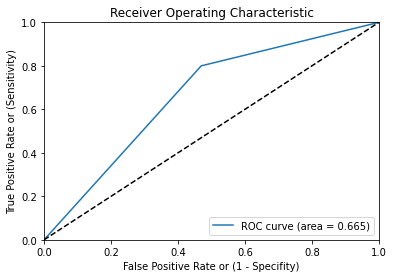

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

# Compute fpr, tpr, thresholds and roc auc
fpr, tpr, thresholds = roc_curve(y, pred_svm, pos_label=2)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

## knn

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_balance, y_balance)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
tuned_parameters_knn = [{'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'metric':['euclidean','manhattan','chebyshev','minkowski','seuclidean','mahalanobis'],
                         'weights':['uniform', 'distance'],
                         'n_neighbors':[3,4,5,6,7,8,9]}]

knn = KNeighborsClassifier()
GS_knn = GridSearchCV(knn, tuned_parameters_knn, cv =10, scoring='accuracy')
GS_knn.fit(X_balance, y_balance)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: __init__() takes exactly 1 positional argument (0 given)

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: __init__() takes exactly 1 positional argument (0 given)

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: __init__() takes exactly 1 positional argument (0 given)

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWa

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid=[{'algorithm': ['auto', 'ball_tree', 'kd_tree',
                                        'brute'],
                          'metric': ['euclidean', 'manhattan', 'chebyshev',
                                     'minkowski', 'seuclidean', 'mahalanobis'],
                          'n_neighbors': [3, 4, 5, 6, 7, 8, 9],
                          'weights': ['uniform', 'distance']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [ ]:
GS_knn.best_params_

{'algorithm': 'auto',
 'metric': 'manhattan',
 'n_neighbors': 7,
 'weights': 'distance'}

In [ ]:
knn = KNeighborsClassifier(algorithm='auto', metric='manhattan', n_neighbors=9, weights='uniform')

In [ ]:
scores_acc_knn = cross_val_score(knn, X_balance, y_balance, cv=13, scoring='accuracy')
scores_acc_knn

array([1.        , 0.83333333, 1.        , 0.83333333, 0.83333333,
       0.8       , 0.8       , 0.8       , 0.8       , 0.8       ,
       0.8       , 0.4       , 0.6       ])

In [ ]:
scores_acc_knn.mean()

0.7923076923076924

In [ ]:
scores_rec_knn = cross_val_score(knn, X_balance, y_balance, cv=14, scoring='recall')
scores_rec_knn

array([1.        , 1.        , 0.33333333, 1.        , 1.        ,
       1.        , 0.66666667, 1.        , 1.        , 0.5       ,
       0.5       , 1.        , 0.5       , 0.5       ])

In [ ]:
scores_rec_knn.mean()

0.7857142857142857

In [ ]:
scores_prec_knn = cross_val_score(knn, X_balance, y_balance, cv=13, scoring='precision')
scores_prec_knn

array([1.        , 0.75      , 1.        , 0.75      , 1.        ,
       0.75      , 1.        , 0.75      , 1.        , 1.        ,
       0.66666667, 0.33333333, 0.5       ])

In [ ]:
scores_prec_knn.mean()

0.8076923076923077

In [ ]:
scores_f1_knn = cross_val_score(knn, X_balance, y_balance, cv=13, scoring='f1')
scores_f1_knn

array([1.        , 0.85714286, 1.        , 0.85714286, 0.8       ,
       0.85714286, 0.8       , 0.85714286, 0.8       , 0.66666667,
       0.8       , 0.4       , 0.5       ])

In [ ]:
scores_f1_knn.mean()

0.7842490842490843

In [ ]:
scores_auc_knn = cross_val_score(knn, X_balance, y_balance, cv=13, scoring='roc_auc')
scores_auc_knn

array([1.        , 0.88888889, 1.        , 1.        , 0.94444444,
       1.        , 1.        , 0.58333333, 1.        , 0.91666667,
       0.91666667, 0.5       , 0.58333333])

In [ ]:
scores_auc_knn.mean()

0.8717948717948717

In [ ]:
pred_knn = cross_val_predict(knn, X_balance, y_balance, cv=10)
confusion_matrix(pred_knn, y_balance)

array([[28, 11],
       [ 7, 24]])

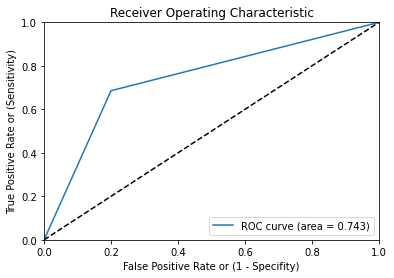

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

# Compute fpr, tpr, thresholds and roc auc
fpr, tpr, thresholds = roc_curve(y_balance, pred_knn, pos_label=2)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

## Bosting

In [ ]:
GBC = GradientBoostingClassifier()
GBC.fit(X_balance, y_balance)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
tuned_parameters_GBC = [{'criterion':['friedman_mse', 'mse', 'mae'],
                         'learning_rate':[0.01, 0.05, 0.1, 0.25, 0.4, 0.6, 0.75, 0.9],
                         'loss':['deviance', 'exponential'],
                         'max_depth':[3,4,5,6,7],
                         'max_features':['auto', 'sqrt', 'log2'],
                         'n_estimators':[30, 50, 100]}]

GBC = GradientBoostingClassifier()
GS_GBC = GridSearchCV(GBC, tuned_parameters_GBC, cv =10, scoring='accuracy')
GS_GBC.fit(X_balance, y_balance)

GridSearchCV(cv=10, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_...
             iid=

In [ ]:
GS_GBC.best_params_

{'criterion': 'friedman_mse',
 'learning_rate': 0.9,
 'loss': 'exponential',
 'max_depth': 4,
 'max_features': 'auto',
 'n_estimators': 50}

In [ ]:
GBC = GradientBoostingClassifier(criterion='mse', learning_rate=0.6 , loss='exponential', max_depth=3 , max_features='auto', n_estimators=30)

In [ ]:
scores_acc_GBC = cross_val_score(GBC, X_balance, y_balance, cv=13, scoring='accuracy')
scores_acc_GBC

array([0.66666667, 1.        , 0.66666667, 0.66666667, 0.83333333,
       0.8       , 1.        , 0.8       , 1.        , 0.8       ,
       0.8       , 0.8       , 1.        ])

In [ ]:
scores_acc_GBC.mean()

0.8333333333333335

In [ ]:
scores_rec_GBC = cross_val_score(GBC, X_balance, y_balance, cv=13, scoring='recall')
scores_rec_GBC

array([0.66666667, 1.        , 0.33333333, 0.66666667, 1.        ,
       0.66666667, 1.        , 0.66666667, 1.        , 0.5       ,
       1.        , 1.        , 1.        ])

In [ ]:
scores_rec_GBC.mean()

0.8076923076923077

In [ ]:
scores_prec_GBC = cross_val_score(GBC, X_balance, y_balance, cv=10, scoring='precision')
scores_prec_GBC

array([1.        , 1.        , 0.66666667, 0.8       , 1.        ,
       0.66666667, 0.6       , 1.        , 1.        , 1.        ])

In [ ]:
scores_prec_GBC.mean()

0.8733333333333334

In [ ]:
scores_f1_GBC = cross_val_score(GBC, X_balance, y_balance, cv=13, scoring='f1')
scores_f1_GBC

array([0.66666667, 1.        , 0.4       , 0.66666667, 0.85714286,
       0.8       , 1.        , 0.8       , 1.        , 0.66666667,
       1.        , 1.        , 1.        ])

In [ ]:
scores_f1_GBC.mean()

0.8351648351648352

In [ ]:
scores_auc_GBC = cross_val_score(GBC, X_balance, y_balance, cv=13, scoring='roc_auc')
scores_auc_GBC

array([0.88888889, 1.        , 0.77777778, 0.66666667, 1.        ,
       0.83333333, 1.        , 1.        , 1.        , 0.83333333,
       1.        , 1.        , 1.        ])

In [ ]:
scores_auc_GBC.mean()

0.9230769230769232

In [ ]:
pred_GBC = cross_val_predict(GBC, X_balance, y_balance, cv=10)
confusion_matrix(pred_GBC, y_balance)

array([[28,  5],
       [ 7, 30]])

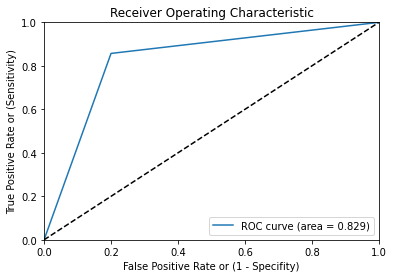

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

# Compute fpr, tpr, thresholds and roc auc
fpr, tpr, thresholds = roc_curve(y_balance, pred_GBC, pos_label=2)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

## Bagging 

In [ ]:
BG = BaggingClassifier()
BG.fit(X_balance, y_balance)

BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=1.0, n_estimators=10,
                  n_jobs=None, oob_score=False, random_state=None, verbose=0,
                  warm_start=False)

In [ ]:
tuned_parameters_BG = [{'max_features':[4,5,6,7],
                        'n_estimators':[30, 50, 100,150],
                        'bootstrap_features':['True', 'False']}]

BG = BaggingClassifier()
GS_BG = GridSearchCV(BG, tuned_parameters_BG, cv =10, scoring='accuracy')
GS_BG.fit(X_balance, y_balance)

GridSearchCV(cv=10, error_score=nan,
             estimator=BaggingClassifier(base_estimator=None, bootstrap=True,
                                         bootstrap_features=False,
                                         max_features=1.0, max_samples=1.0,
                                         n_estimators=10, n_jobs=None,
                                         oob_score=False, random_state=None,
                                         verbose=0, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'bootstrap_features': ['True', 'False'],
                          'max_features': [4, 5, 6, 7],
                          'n_estimators': [30, 50, 100, 150]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [ ]:
GS_BG.best_params_

{'bootstrap_features': 'True', 'max_features': 7, 'n_estimators': 30}

In [ ]:
BG = BaggingClassifier(bootstrap_features='True', max_features=7, n_estimators=30)

In [ ]:
scores_acc_BG = cross_val_score(BG, X_balance, y_balance, cv=10, scoring='accuracy')
scores_acc_BG

array([0.85714286, 0.71428571, 0.57142857, 0.57142857, 0.85714286,
       0.57142857, 0.71428571, 0.85714286, 0.28571429, 0.71428571])

In [ ]:
scores_acc_BG.mean()

0.6714285714285715

In [ ]:
scores_rec_BG = cross_val_score(BG, X_balance, y_balance, cv=12, scoring='recall')
scores_rec_BG

array([1.        , 1.        , 0.33333333, 1.        , 0.66666667,
       1.        , 1.        , 1.        , 1.        , 0.66666667,
       0.66666667, 0.5       ])

In [ ]:
scores_rec_BG.mean()

0.8194444444444443

In [ ]:
scores_prec_BG = cross_val_score(BG, X_balance, y_balance, cv=12, scoring='precision')
scores_prec_BG

array([0.66666667, 1.        , 0.66666667, 1.        , 0.66666667,
       0.6       , 0.6       , 1.        , 1.        , 0.5       ,
       0.66666667, 1.        ])

In [ ]:
scores_prec_BG.mean()

0.7805555555555554

In [ ]:
scores_f1_BG = cross_val_score(BG, X_balance, y_balance, cv=13, scoring='f1')
scores_f1_BG

array([1.        , 0.85714286, 0.        , 0.85714286, 0.66666667,
       0.66666667, 1.        , 0.66666667, 0.66666667, 0.66666667,
       0.5       , 0.        , 0.66666667])

In [ ]:
scores_f1_BG.mean()

0.631868131868132

In [ ]:
scores_auc_BG = cross_val_score(BG, X_balance, y_balance, cv=9, scoring='roc_auc')
scores_auc_BG

array([1.    , 0.625 , 1.    , 0.9375, 0.875 , 1.    , 1.    , 0.625 ,
       0.75  ])

In [ ]:
scores_auc_BG.mean()

0.8680555555555556

In [ ]:
pred_BG = cross_val_predict(BG, X_balance, y_balance, cv=10)
confusion_matrix(pred_BG, y_balance)

array([[27, 10],
       [ 8, 25]])

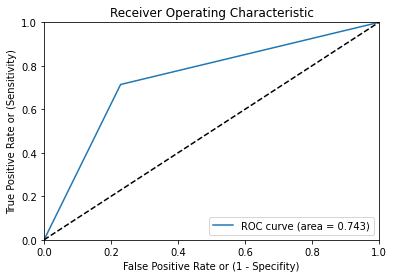

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

# Compute fpr, tpr, thresholds and roc auc
fpr, tpr, thresholds = roc_curve(y_balance, pred_BG, pos_label=2)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

# Visualization

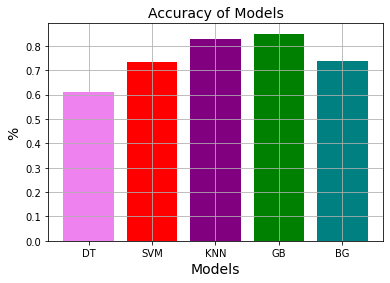

In [ ]:
Accuracy = ['DT','SVM','KNN','GB','BG']
Percentage =[ 0.61, 0.733, 0.83, 0.85, 0.74]

New_Colors = ['violet','red','purple','green','teal']
plt.bar(Accuracy, Percentage, color=New_Colors)
plt.title('Accuracy of Models', fontsize=14)
plt.xlabel('Models', fontsize=14)
plt.ylabel('%', fontsize=14)
plt.grid(True)
plt.show()

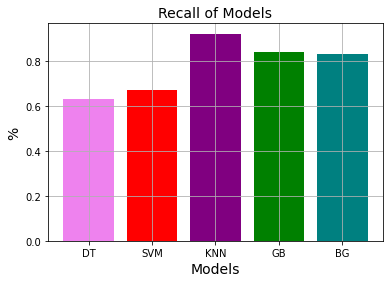

In [ ]:
Recall = ['DT','SVM','KNN','GB','BG']
Percentage = [0.63, 0.67, 0.92, 0.84, 0.83]

New_Colors = ['violet','red','purple','green','teal']
plt.bar(Recall, Percentage, color=New_Colors)
plt.title('Recall of Models', fontsize=14)
plt.xlabel('Models', fontsize=14)
plt.ylabel('%', fontsize=14)
plt.grid(True)
plt.show()

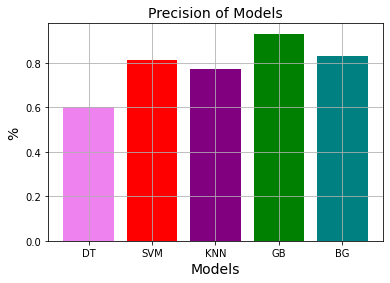

In [ ]:
Precision = ['DT','SVM','KNN','GB','BG']
Percentage = [0.6, 0.81, 0.77, 0.93, 0.83]

New_Colors = ['violet','red','purple','green','teal']
plt.bar(Precision, Percentage, color=New_Colors)
plt.title('Precision of Models', fontsize=14)
plt.xlabel('Models', fontsize=14)
plt.ylabel('%', fontsize=14)
plt.grid(True)
plt.show()

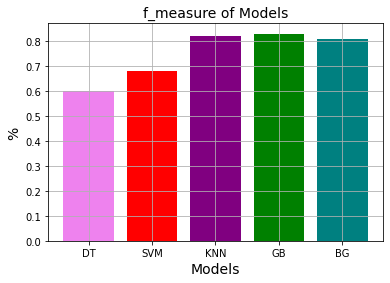

In [ ]:
f_measure = ['DT','SVM','KNN','GB','BG']
Percentage = [0.6, 0.68, 0.82, 0.83, 0.81]

New_Colors = ['violet','red','purple','green','teal']
plt.bar(f_measure, Percentage, color=New_Colors)
plt.title('f_measure of Models', fontsize=14)
plt.xlabel('Models', fontsize=14)
plt.ylabel('%', fontsize=14)
plt.grid(True)
plt.show()

# خوشه بندی k-means

In [ ]:
from sklearn.cluster import KMeans
test1= KMeans(n_clusters=2,max_iter=10,n_init=20)
X = df.drop('Classification', axis=1)
test1.fit(X)
labels=test1.labels_
test1.cluster_centers_

array([[ 57.67647059,  29.7235404 ,  95.08823529,   9.93670588,
          2.43803229,  27.94645   ,   8.42311618,  16.80516529,
        863.56138235],
       [ 56.98571429,  26.48332758,  93.87142857,   8.0597    ,
          1.91975619,  23.07895571,  10.16441343,  11.74476414,
        349.56575714]])

In [ ]:
from sklearn.metrics import silhouette_score,v_measure_score
si= silhouette_score(X,labels)
si

0.5624383200175069

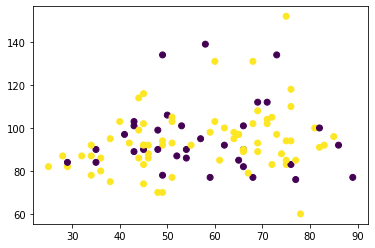

In [ ]:
plt.scatter(X.iloc[:,0],X.iloc[:,2], c=labels)
plt.show()

# خوشه بندی سلسله مراتبی

[ 36  56  66  97  90  52 102  24   7  45  48   5  39   6   1  33  23  61
  53  67  94  82 103  62  95 104  75  68  96  80  50  92  58  64  71  29
  74  78  27  46  21  14  17  15  20  16  19   3  57  69  49  70  60  37
  34   2  79  10  81  84  42  43  54  72  30  38  13  11  55   8  41  88
  59  85  86  98  35  83  89 100 101  99  93  87  77  32  63  31  40  26
  44  65  22  28  18  76  91  73  12   9   4  25  47  51]


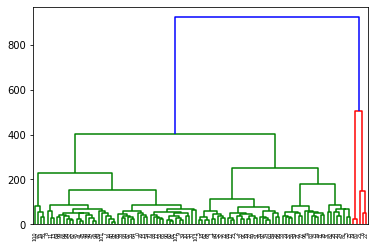

In [ ]:
from scipy.cluster.hierarchy import linkage,dendrogram,fcluster
import matplotlib.pyplot as plt
hir = linkage(X,method='average')
labels = fcluster(hir, 2, criterion='distance')
print(labels)
dendrogram(hir,leaf_rotation=90)
plt.show()

# DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=50, min_samples=5)
dbscan.fit(X)
labels = dbscan.labels_


In [ ]:
from sklearn.metrics import silhouette_score,v_measure_score

In [ ]:
labels


array([ 0,  0,  0, -1, -1,  0, -1,  0, -1,  0,  0,  0,  0,  0, -1,  0,  0,
        0,  0,  0, -1,  0, -1,  0, -1, -1,  0,  0, -1,  0, -1, -1,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,
        0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0, -1, -1, -1, -1,  0,  0,
        0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0, -1,  0,
        0,  0])

In [ ]:
from sklearn.metrics import silhouette_score,v_measure_score
si= silhouette_score(X,labels)
si

0.4228795661874496

In [ ]:
# Feature selection

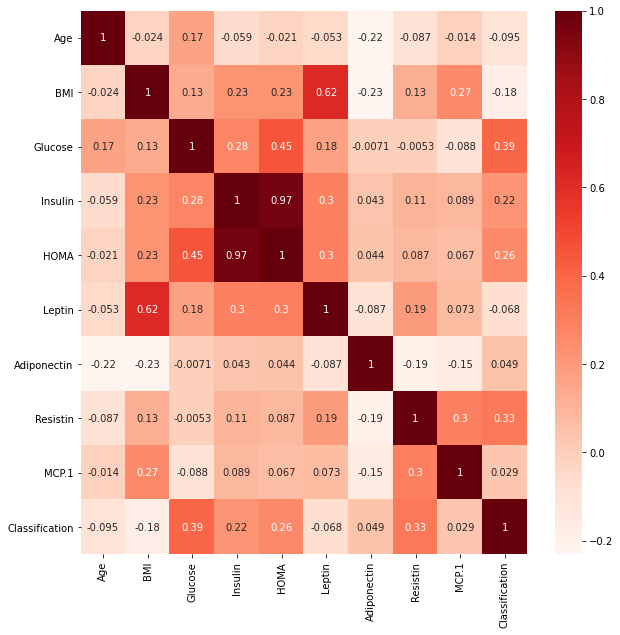

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [ ]:
rng= np.random.RandomState(42)
noise=rng.normal(size=(len(y), 50))

import numpy as np
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X_normal, y, test_size=0.3)
from sklearn.feature_selection import SelectPercentile
select = SelectPercentile(percentile=50)
select.fit(X_train, y_train)

X_train_selected= select.transform(X_train)
print("X_train.shape:{}".format(X_train.shape))
print("X_train_selected.shape:{}".format(X_train_selected.shape))

X_train.shape:(72, 9)
X_train_selected.shape:(72, 4)


[False False  True  True  True False False  True False]


Text(0.5, 0, 'Sample index')

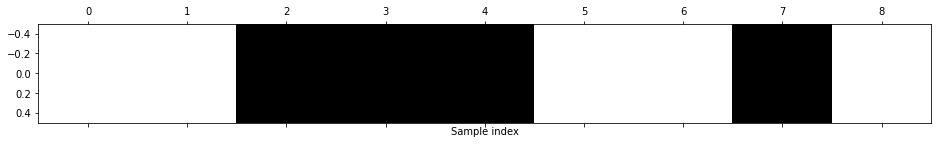

In [ ]:
mask=select.get_support()
print(mask)

plt.matshow(mask.reshape(1,-1), cmap='gray_r')
plt.xlabel("Sample index")

In [ ]:
from sklearn.linear_model import LogisticRegression
X_test_selected = select.transform(X_test)
lr= LogisticRegression()
lr.fit(X_train, y_train)
print("Score with all features: {:.3f}".format(lr.score(X_test, y_test)))
lr.fit(X_train_selected, y_train)
print("Score with all selected features: {:.3f}".format(lr.score(X_test_selected, y_test)))

Score with all features: 0.781
Score with all selected features: 0.656


In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
select= SelectFromModel(RandomForestClassifier(n_estimators= 50, random_state=30), threshold='median')

In [ ]:
select.fit(X_train, y_train)
X_train_h=select.transform(X_train)
print("X_train.shape:{}".format(X_train.shape))
print("X_train_h.shape:{}".format(X_train_h.shape))

X_train.shape:(72, 9)
X_train_h.shape:(72, 5)


Text(0.5, 0, 'Sample index')

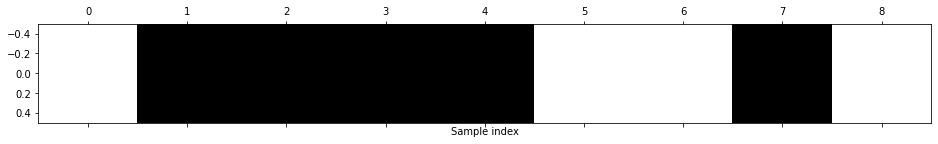

In [ ]:
mask= select.get_support()

plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Sample index")

In [ ]:
X_test_h=select.transform(X_test)
score=LogisticRegression().fit(X_train_h, y_train).score(X_test_h, y_test)
print("Test score:{:.3f}".format(score))

Test score:0.781


Text(0.5, 0, 'Sample index')

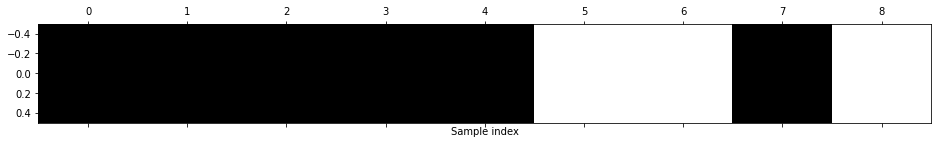

In [ ]:
from sklearn.feature_selection import RFE
select= RFE(RandomForestClassifier(n_estimators= 50, random_state=30), n_features_to_select= 6)
select.fit(X_train, y_train)

mask=select.get_support()
plt.matshow(mask.reshape(1,-1), cmap='gray_r')
plt.xlabel("Sample index")

In [ ]:
X_train_rfe= select.transform(X_train)
X_test_rfe= select.transform(X_test)
score= LogisticRegression().fit(X_train_rfe, y_train).score(X_test_rfe, y_test)
print("Test score: {:.3f}".format(score))
print("Test score: {:.3f}".format(select.score(X_test, y_test)))

Test score: 0.812
Test score: 0.688


In [ ]:
# Association Rules

In [ ]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder

te=TransactionEncoder()
te_ary=te.fit(df).transform(df)
df=pd.DataFrame(te_ary, columns=te.columns_)
df

,.,1,A,B,C,G,H,I,L,M,O,P,R,a,c,d,e,f,g,i,l,n,o,p,s,t,u
0,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False
1,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,True,False,False,False,True,False,True,False,True,False,True
3,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False,True,False,True
4,False,False,True,False,False,False,True,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
100,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
101,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
102,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
from mlxtend.frequent_patterns import apriori
apriori(df, min_support=0.0005, use_colnames=True)

,support,itemsets
0,0.009615,(.)
1,0.009615,(1)
2,0.028846,(A)
3,0.009615,(B)
4,0.019231,(C)
...,...,...
1773,0.009615,"(c, s, C, a, n, o, t, i, l)"
1774,0.009615,"(f, s, C, a, n, o, t, i, l)"
1775,0.009615,"(c, f, s, C, n, o, t, i, l)"
1776,0.009615,"(c, f, s, a, n, o, t, i, l)"


In [ ]:
frequent_itemsets=apriori(df,min_support=0.0005, use_colnames=True)
frequent_itemsets['length']=frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
0,0.009615,(.),1
1,0.009615,(1),1
2,0.028846,(A),1
3,0.009615,(B),1
4,0.019231,(C),1
...,...,...,...
1773,0.009615,"(c, s, C, a, n, o, t, i, l)",9
1774,0.009615,"(f, s, C, a, n, o, t, i, l)",9
1775,0.009615,"(c, f, s, C, n, o, t, i, l)",9
1776,0.009615,"(c, f, s, a, n, o, t, i, l)",9


In [ ]:
apriori(df,min_support=0.0005, use_colnames=False, max_len=None)


,support,itemsets
0,0.009615,(0)
1,0.009615,(1)
2,0.028846,(2)
3,0.009615,(3)
4,0.019231,(4)
...,...,...
1773,0.009615,"(4, 13, 14, 19, 20, 21, 22, 24, 25)"
1774,0.009615,"(4, 13, 17, 19, 20, 21, 22, 24, 25)"
1775,0.009615,"(4, 14, 17, 19, 20, 21, 22, 24, 25)"
1776,0.009615,"(13, 14, 17, 19, 20, 21, 22, 24, 25)"


In [ ]:
# Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(random_state=30)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.6875

In [ ]:
for i,j in sorted(zip(X_train.columns, model.feature_importances_)):
  print(i,j)

0 0.10819375065864703
1 0.15249229833480848
2 0.18056801615177803
3 0.09162318395445962
4 0.10435363825954887
5 0.07947475699582132
6 0.06969105616787544
7 0.14148217027488877
8 0.07212112920217241


In [ ]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(random_state=30)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.31417142857142855

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
model=AdaBoostClassifier(random_state=30)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.625

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
model=AdaBoostRegressor(random_state=30)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.09419690178661999